## Install Monocle3

In [ ]:
install.packages("synapser", repos=c("http://ran.synapse.org", "http://cran.fhcrc.org"))
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install()
BiocManager::install(c("Biobase", "BiocGenerics","DelayedArray","DelayedMatrixStats","limma","S4Vectors","SingleCellExperiment","SummarizedExperiment"))
install.packages("devtools")
devtools::install_github('cole-trapnell-lab/monocle3')

In [1290]:
### Load packages ###
library(monocle3) 
library(Matrix)
library(synapser)
synLogin('relyanow','thisismysynapsenaga1!') #### TODO: remove!


TERMS OF USE NOTICE:
  When using Synapse, remember that the terms and conditions of use require that you:
  1) Attribute data contributors when discussing these data or results from these data.
  2) Not discriminate, identify, or recontact individuals or groups represented by the data.
  3) Use and contribute only data de-identified to HIPAA standards.
  4) Redistribute data only under these same terms of use.


Attaching package: ‘synapser’

The following object is masked from ‘package:Seurat’:

    Project

The following object is masked from ‘package:Rfast’:

    Table



Welcome, relyanow!

NULL

### Load Mathys single nucleus ROSMAP data from Synapse

In [1291]:
# get data
p <- synapser::synGet('syn18686381')
counts <- readMM(p$path)

# Obtain a pointer and download the data
syn18642934 <- synGet(entity='syn18642934') 
# get batch metadata
batches <- read.csv(syn18642934$path,stringsAsFactors = F)

p2 <- synapser::synGet('syn18686372')
# get metadata
Labels <- read.delim(p2$path,stringsAsFactors = F)

p3 <- synapser::synGet('syn18686382')
rownames(counts) <- readLines(p3$path)   

colnames(counts) <- Labels[,1]
rownames(Labels) <- Labels[,1]

# get id mappings
p3 <- synapser::synGet('syn18694015')
ids <- read.csv(p3$path,stringsAsFactors = F)

metadata <- read.csv('ROSMAP_metadata2.csv')
p4 <- synGet(entity='syn3191087') 
metadata2 <- read.csv(p4$path)

sex = c()
m = as.character(metadata$msex)
fileName = c()
batch = c()
ros_ids = c()
projid = c()
Diagnosis = c()
cogdx = c()
ceradsc = c()
braaksc = c()
tangles = c()
apoe_genotype = c()
pmi = c()
educ=c()
race=c()
AOD=c()
# map metadata to cells
for(i in 1:length(rownames(Labels))){
    ros_ids = c(ros_ids,ids$Subject[c(which(ids$projid==Labels$projid[i])[1])])
    fileName = c(fileName,ids$fastq[c(which(ids$projid==Labels$projid[i])[1])])
}
Labels$ros_ids = ros_ids
Labels$fileName = fileName
head(Labels)
for(i in 1:length(rownames(Labels))){
    batch = c(batch,batches$sequencingBatch[c(which(batches$fileName==Labels$fileName[i])[1])])
    Diagnosis = c(Diagnosis,metadata$pathology.group[c(which(metadata$Subject==Labels$ros_id[i])[1])])
    cogdx = c(cogdx,metadata$cogdx[c(which(metadata$Subject==Labels$ros_id[i])[1])])
    sex = c(sex,m[c(which(metadata$Subject==Labels$ros_id[i])[1])])
    ceradsc = c(ceradsc,metadata$ceradsc[c(which(metadata$Subject==Labels$ros_id[i])[1])])
    braaksc = c(braaksc,metadata$braaksc[c(which(metadata$Subject==Labels$ros_id[i])[1])])
    tangles = c(tangles,metadata$tangles[c(which(metadata$Subject==Labels$ros_id[i])[1])])
    apoe_genotype = c(apoe_genotype,metadata2$apoe_genotype[c(which(metadata2$projid==Labels$projid[i])[1])])
    pmi = c(pmi,metadata2$pmi[c(which(metadata2$projid==Labels$projid[i])[1])])
    educ = c(educ,metadata2$educ[c(which(metadata2$projid==Labels$projid[i])[1])])
    race = c(race,metadata2$race[c(which(metadata2$projid==Labels$projid[i])[1])])
    AOD = c(AOD,metadata2$age_first_ad_dx[c(which(metadata2$projid==Labels$projid[i])[1])])
}
Labels$batch = batch
Labels$Diagnosis = Diagnosis
Labels$cogdx = cogdx
Labels$sex = sex
Labels$ceradsc = ceradsc
Labels$braaksc = braaksc
Labels$tangles = tangles
Labels$apoe_genotype = apoe_genotype
Labels$pmi = pmi
Labels$educ=educ
Labels$race=race
Labels$AOD=AOD

Labels$Diagnosis[Labels$Diagnosis=='late-pathology'] <- "Late-pathology AD"
Labels$Diagnosis[Labels$Diagnosis=='no-pathology'] <- 'Control'
Labels$Diagnosis[Labels$Diagnosis=='early-pathology'] <- 'Early-pathology AD'
Labels$simpleDiagnosis = Labels$Diagnosis
Labels$simpleDiagnosis[Labels$simpleDiagnosis!='Control'] <- "AD"
Labels$Diagnosis[Labels$Diagnosis==1]='Early-pathology AD'
Labels$Diagnosis[Labels$Diagnosis==2]='Late-pathology AD'
Labels$Diagnosis[Labels$Diagnosis==3]='Control'
head(Labels)

TAG                projid   tsne1     tsne2    pre.cluster
AAACGGGAGATCCCGC.1 AAACGGGAGATCCCGC.1 11409232 18.076541 43.89940 15         
AAATGCCTCCAATGGT.1 AAATGCCTCCAATGGT.1 11409232  8.130535 20.68742  3         
AACCATGTCAGTGCAT.1 AACCATGTCAGTGCAT.1 11409232 17.088242 47.27229 15         
AACCATGTCTGTACGA.1 AACCATGTCTGTACGA.1 11409232 15.482062 23.71838  3         
AACCGCGTCCGCATAA.1 AACCGCGTCCGCATAA.1 11409232 28.993102 16.22391  2         
AACGTTGGTTCAGGCC.1 AACGTTGGTTCAGGCC.1 11409232 16.909351 24.84811  3         
                   broad.cell.type Subcluster ros_ids
AAACGGGAGATCCCGC.1 Ex              Ex8        ROS13  
AAATGCCTCCAATGGT.1 Ex              Ex0        ROS13  
AACCATGTCAGTGCAT.1 Ex              Ex8        ROS13  
AACCATGTCTGTACGA.1 Ex              Ex0        ROS13  
AACCGCGTCCGCATAA.1 Ex              Ex0        ROS13  
AACGTTGGTTCAGGCC.1 Ex              Ex0        ROS13  
                   fileName                        
AAACGGGAGATCCCGC.1 D17-8753_S1_L001_I1_001.fastq.gz
AAATGCCTCCAATGGT.1 D17-8753_S1_L001_I1_001.fastq.gz
AACCATGTCAGTGCAT.1 D17-8753_S1_L001_I1_001.fastq.gz
AACCATGTCTGTACGA.1 D17-8753_S1_L001_I1_001.fastq.gz
AACCGCGTCCGCATAA.1 D17-8753_S1_L001_I1_001.fastq.gz
AACGTTGGTTCAGGCC.1 D17-8753_S1_L001_I1_001.fastq.gz

TAG                projid   tsne1     tsne2    pre.cluster
AAACGGGAGATCCCGC.1 AAACGGGAGATCCCGC.1 11409232 18.076541 43.89940 15         
AAATGCCTCCAATGGT.1 AAATGCCTCCAATGGT.1 11409232  8.130535 20.68742  3         
AACCATGTCAGTGCAT.1 AACCATGTCAGTGCAT.1 11409232 17.088242 47.27229 15         
AACCATGTCTGTACGA.1 AACCATGTCTGTACGA.1 11409232 15.482062 23.71838  3         
AACCGCGTCCGCATAA.1 AACCGCGTCCGCATAA.1 11409232 28.993102 16.22391  2         
AACGTTGGTTCAGGCC.1 AACGTTGGTTCAGGCC.1 11409232 16.909351 24.84811  3         
                   broad.cell.type Subcluster ros_ids
AAACGGGAGATCCCGC.1 Ex              Ex8        ROS13  
AAATGCCTCCAATGGT.1 Ex              Ex0        ROS13  
AACCATGTCAGTGCAT.1 Ex              Ex8        ROS13  
AACCATGTCTGTACGA.1 Ex              Ex0        ROS13  
AACCGCGTCCGCATAA.1 Ex              Ex0        ROS13  
AACGTTGGTTCAGGCC.1 Ex              Ex0        ROS13  
                   fileName                         batch ⋯ sex  ceradsc
AAACGGGAGATCCCGC.1 D17-8753_S1_L001_I1_001.fastq.gz 1     ⋯ male 4      
AAATGCCTCCAATGGT.1 D17-8753_S1_L001_I1_001.fastq.gz 1     ⋯ male 4      
AACCATGTCAGTGCAT.1 D17-8753_S1_L001_I1_001.fastq.gz 1     ⋯ male 4      
AACCATGTCTGTACGA.1 D17-8753_S1_L001_I1_001.fastq.gz 1     ⋯ male 4      
AACCGCGTCCGCATAA.1 D17-8753_S1_L001_I1_001.fastq.gz 1     ⋯ male 4      
AACGTTGGTTCAGGCC.1 D17-8753_S1_L001_I1_001.fastq.gz 1     ⋯ male 4      
                   braaksc tangles  apoe_genotype pmi      educ race AOD
AAACGGGAGATCCCGC.1 3       1.109769 33            1.333333 22   1    1  
AAATGCCTCCAATGGT.1 3       1.109769 33            1.333333 22   1    1  
AACCATGTCAGTGCAT.1 3       1.109769 33            1.333333 22   1    1  
AACCATGTCTGTACGA.1 3       1.109769 33            1.333333 22   1    1  
AACCGCGTCCGCATAA.1 3       1.109769 33            1.333333 22   1    1  
AACGTTGGTTCAGGCC.1 3       1.109769 33            1.333333 22   1    1  
                   simpleDiagnosis
AAACGGGAGATCCCGC.1 AD             
AAATGCCTCCAATGGT.1 AD             
AACCATGTCAGTGCAT.1 AD             
AACCATGTCTGTACGA.1 AD             
AACCGCGTCCGCATAA.1 AD             
AACGTTGGTTCAGGCC.1 AD

## Preprocessing

In [1292]:
inds = rowSums(counts)>=250
length(inds)
counts = counts[inds,] # only keep genes non-zero in at least 250 cells

[1] 17926

In [1293]:
detach("package:synapser", unload=TRUE)
unloadNamespace("PythonEmbedInR") # must unload synapser because causes multiple definitions of S4Vectors

In [1294]:
library(Matrix)
library(scater)
library(monocle3)

# create monocle object
gene_short_name <- data.frame(rownames(counts))
rownames(gene_short_name) <- rownames(counts)
gene_short_name$gene_short_name <- rownames(counts)
head(gene_short_name)
length(gene_short_name)

cds <- new_cell_data_set(counts,
                     cell_metadata = Labels,
                     gene_metadata = gene_short_name)

rownames.counts. gene_short_name
FO538757.2 FO538757.2       FO538757.2     
NOC2L      NOC2L            NOC2L          
KLHL17     KLHL17           KLHL17         
HES4       HES4             HES4           
ISG15      ISG15            ISG15          
AGRN       AGRN             AGRN

[1] 2

In [1295]:
### impute missing PMI values
paste('Imputing PMI to:',median(cds$pmi[!is.na(cds$pmi)]))
cds$pmi[is.na(cds$pmi)]=median(cds$pmi[!is.na(cds$pmi)])
cds$apoe_genotype[is.na(cds$apoe_genotype)] = '33'

[1] "Imputing PMI to: 7.58333333333333"

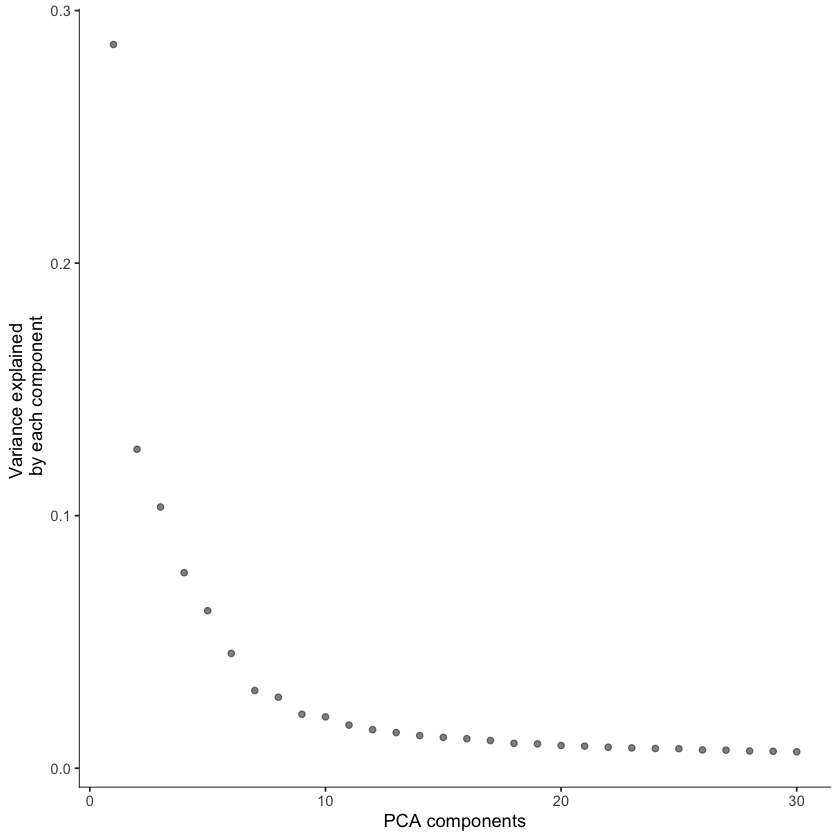

In [1365]:
### preprocessing and reduce dimensionality
### preprocessing includes library size normalization and regressing out batch, eduction, and pmi
### note: data is not log-normalized

mathy_marker_genes <- read.csv('../data/mathys_marker_genes.csv')
names(mathy_marker_genes) <- as.matrix(mathy_marker_genes[1, ])
mathy_marker_genes <- mathy_marker_genes[-1, ]
mathy_marker_genes$adj.pvals = as.numeric(as.character(mathy_marker_genes$adj.pvals))

genes2<-c()
for (gene in unique(c(as.vector(mathy_marker_genes$gene.name),c("SYT1","SNAP25","GRIN1","GAD1","GAD2","SLC17A7","CAMK2A","NRGN","AQP4",
                              "GFAP","MBP","MOBP","PLP1","PDGFRA","VCAN","CD74","CSF1R","C3","FLT1","CLDN5")))){
    if (gene %in% rownames(cds)){
        genes2 <- c(genes2,which(rownames(cds)==gene))
    }
}
length(genes)
cds <- cds[genes2,]

cds = preprocess_cds(cds, num_dim = 30,method="PCA",norm_method="size_only",residual_model_formula_str="~batch+educ+pmi")
cds = reduce_dimension(cds)
plot_pc_variance_explained(cds)

In [1297]:
### save progress
saveRDS(cds, file = "Mathys_monocle_preprocessed_cds.rds")

In [1372]:
library(Matrix)
library(scater)
library(monocle3)
cds = readRDS(file = "Mathys_monocle_preprocessed_cds.rds")

In [1373]:
library(ggplot2)
library(gridExtra)
library(MASS)
library(limma)
library(edgeR)
library(grid)
cds$educ = as.numeric(cds$educ)
cds$Education = cds$educ
cds$Sex = cds$sex
cds$CERAD = cds$ceradsc
cds$Braak = cds$braaksc
cds$APOE_genotype = cds$apoe_genotype
cds$batch = as.character(cds$batch)
cds$Diagnosis[cds$Diagnosis=='Early-pathology AD']='Early-path AD'
cds$Diagnosis[cds$Diagnosis=='Late-pathology AD']='Late-path AD'

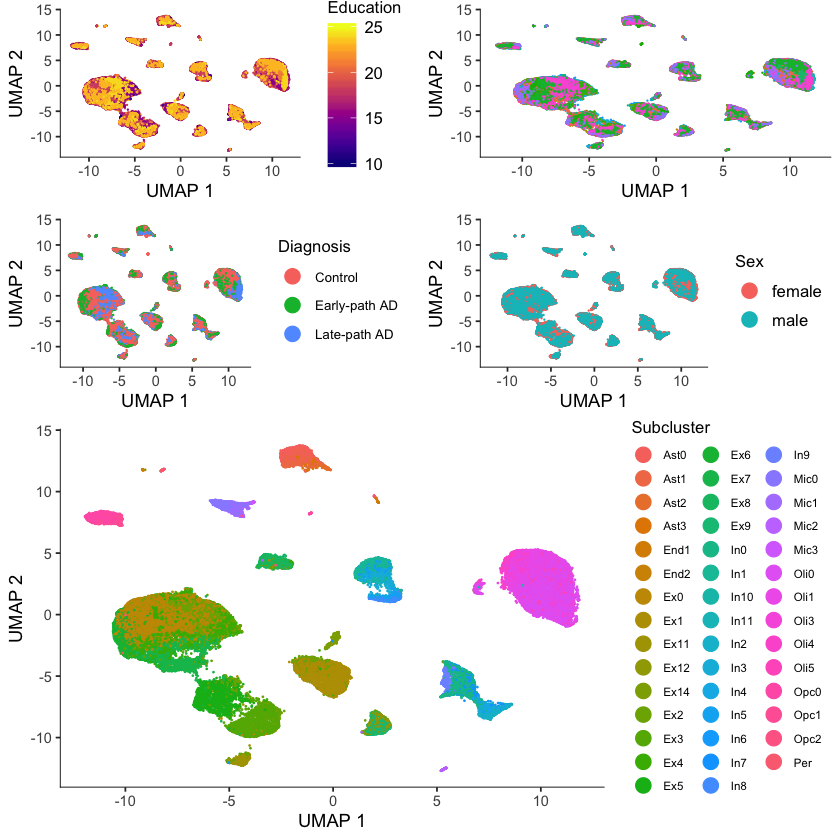

In [1374]:
p1<-plot_cells(cds, color_cells_by="Education",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 10))
p2<-plot_cells(cds, color_cells_by="Sex",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 10))
p3<-plot_cells(cds, color_cells_by="Diagnosis",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 8))
p4<-plot_cells(cds, color_cells_by="ros_ids",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(legend.position = "none")
p6<-plot_cells(cds, color_cells_by="Subcluster",cell_size=.1,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 7),legend.key.size = unit(.5, "cm"),
  legend.key.width = unit(0.5,"cm") )
#pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_summary.pdf"))
grid.arrange(arrangeGrob(p1,p4, ncol=2),arrangeGrob(p3,p2,ncol=2),p6, heights=c(2,2,4), ncol=1)
#dev.off()

## Plot trajectories for each cell type

In [134]:
for (celltype in unique(cds$broad.cell.type)){   
    if (length(cds$Subcluster[cds$broad.cell.type==celltype])<1000){
        cell_size=1}
    else if (length(cds$Subcluster[cds$broad.cell.type==celltype])<3000){
        cell_size=.5}
    else if (length(cds$Subcluster[cds$broad.cell.type==celltype])<5000){
        cell_size=.1}
    else if (length(cds$Subcluster[cds$broad.cell.type==celltype])<10000){
        cell_size=.02}
    else {
        cell_size=.01
    }
    cds_subset = cds[,cds$broad.cell.type==celltype] 
    cds_subset = cds_subset[rowSums(exprs(cds_subset) != 0) >= 10,] # only keep genes non-zero in at least 10 cells
    cds_subset = reduce_dimension(cds_subset)
    cds_subset = cluster_cells(cds_subset)

    cds_subset <- learn_graph(cds_subset)

    p1<-plot_cells(cds_subset, color_cells_by="Sex",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 9),legend.key.size = unit(.1, "cm"),
  legend.key.width = unit(0.1,"cm"))
    p2<-plot_cells(cds_subset, color_cells_by="APOE_genotype",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 9),legend.key.size = unit(.1, "cm"),
  legend.key.width = unit(0.1,"cm"))
    p3<-plot_cells(cds_subset, color_cells_by="Braak",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 9),legend.key.size = unit(.1, "cm"),
  legend.key.width = unit(0.1,"cm"))
    p4<-plot_cells(cds_subset, color_cells_by="CERAD",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 9),legend.key.size = unit(.1, "cm"),
  legend.key.width = unit(0.1,"cm"))
    p5<-plot_cells(cds_subset, color_cells_by="Diagnosis",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 9),legend.key.size = unit(.1, "cm"),
  legend.key.width = unit(0.1,"cm"))
    p6<-plot_cells(cds_subset, color_cells_by="ros_ids",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1)+theme(legend.position = "none")
    p7<-plot_cells(cds_subset, color_cells_by="Subcluster",cell_size=cell_size*3,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 9),legend.key.size = unit(.1, "cm"),
  legend.key.width = unit(0.1,"cm"))
    #pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_",celltype,".pdf"))
    grid.arrange(arrangeGrob(p6,p1, ncol=2),arrangeGrob(p3,p4,ncol=2),arrangeGrob(p2,p5, ncol=2),p7, heights=c(2,2,2,4.3), ncol=1)
    #dev.off()
    }

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


### Plot trajectories for each subtype identified by Mathys and identify which vary across diagnosis/sex

In [135]:
for (subcluster in unique(cds$Subcluster)){   #unique(cds$Subcluster)
    if (length(cds$Subcluster[cds$Subcluster==subcluster])<1000){
        cell_size=1}
    else if (length(cds$Subcluster[cds$Subcluster==subcluster])<3000){
        cell_size=.5}
    else {
        cell_size=.1
    }
    cds_subset = cds[,cds$Subcluster==subcluster] # mic3 subcluster
    cds_subset = cds_subset[rowSums(exprs(cds_subset) != 0) >= 10,] # only keep genes non-zero in at least 10 cells
    cds_subset = reduce_dimension(cds_subset)
    cds_subset = cluster_cells(cds_subset)

    cds_subset <- learn_graph(cds_subset,use_partition=T)

    p1<-plot_cells(cds_subset, color_cells_by="Sex",cell_size=cell_size*3,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p2<-plot_cells(cds_subset, color_cells_by="APOE_genotype",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p3<-plot_cells(cds_subset, color_cells_by="Braak",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p4<-plot_cells(cds_subset, color_cells_by="CERAD",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p6<-plot_cells(cds_subset, color_cells_by="Diagnosis",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_",subcluster,".pdf"))
    grid.arrange(arrangeGrob(p6,p2, ncol=2),arrangeGrob(p3,p4,ncol=2),p1, heights=c(2,2,4), ncol=1)
    dev.off()
    }

Warning message in louvain_clustering(data, pd[row.names(data), ], k = k, weight = weight, :
“RANN counts the point itself, k must be smaller than
the total number of points - 1 (all other points) - 1 (itself)!”

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

Warning message in louvain_clustering(data, pd[row.names(data), ], k = k, weight = weight, :
“RANN counts the point itself, k must be smaller than
the total number of points - 1 (all other points) - 1 (itself)!”

  |======================================================================| 100%


Warning message in louvain_clustering(data, pd[row.names(data), ], k = k, weight = weight, :
“RANN counts the point itself, k must be smaller than
the total number of points - 1 (all other points) - 1 (itself)!”

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Warning message in louvain_clustering(data, pd[row.names(data), ], k = k, weight = weight, :
“RANN counts the point itself, k must be smaller than
the total number of points - 1 (all other points) - 1 (itself)!”

  |======================================================================| 100%


In [136]:
### Female ###
for (subcluster in unique(cds$Subcluster)){   #unique(cds$Subcluster)
    if (length(cds$Subcluster[cds$Subcluster==subcluster])<1000){
        cell_size=1}
    else if (length(cds$Subcluster[cds$Subcluster==subcluster])<3000){
        cell_size=.5}
    else {
        cell_size=.1
    }
    cds_subset = cds[,colData(cds)$sex=="female"] # mic3 subcluster
    cds_subset = cds_subset[,cds_subset$Subcluster==subcluster] # mic3 subcluster
    cds_subset = cds_subset[rowSums(exprs(cds_subset) != 0) >= 10,] # only keep genes non-zero in at least 10 cells
    cds_subset = reduce_dimension(cds_subset)
    cds_subset = cluster_cells(cds_subset)

    cds_subset <- learn_graph(cds_subset)

    p1<-plot_cells(cds_subset, color_cells_by="ros_ids",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(legend.position = "none")
    p2<-plot_cells(cds_subset, color_cells_by="APOE_genotype",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p3<-plot_cells(cds_subset, color_cells_by="Braak",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p4<-plot_cells(cds_subset, color_cells_by="CERAD",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p5<-plot_cells(cds_subset, color_cells_by="Diagnosis",cell_size=cell_size*3,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_female_",subcluster,".pdf"))
    grid.arrange(arrangeGrob(p1,p2, ncol=2),arrangeGrob(p3,p4,ncol=2),p5, heights=c(2,2,4), ncol=1)
    dev.off()
    }

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Warning message in louvain_clustering(data, pd[row.names(data), ], k = k, weight = weight, :
“RANN counts the point itself, k must be smaller than
the total number of points - 1 (all other points) - 1 (itself)!”

In [143]:
### Male ###
for (subcluster in unique(cds$Subcluster)){   #
    if (length(cds$Subcluster[cds$Subcluster==subcluster])<1000){
        cell_size=1}
    else if (length(cds$Subcluster[cds$Subcluster==subcluster])<3000){
        cell_size=.5}
    else {
        cell_size=.1
    }
    cds_subset = cds[,colData(cds)$sex=="male"] # mic3 subcluster
    cds_subset = cds_subset[,cds_subset$Subcluster==subcluster] # mic3 subcluster
    cds_subset = cds_subset[rowSums(exprs(cds_subset) != 0) >= 10,] # only keep genes non-zero in at least 10 cells
    cds_subset = reduce_dimension(cds_subset)
    cds_subset = cluster_cells(cds_subset)

    cds_subset <- learn_graph(cds_subset)
    inds = which(colData(cds_subset)$CERAD==4)
    cds_subset = order_cells(cds_subset,root_cells=row.names(colData(cds_subset))[inds[1]])

    p1<-plot_cells(cds_subset, color_cells_by="ros_ids",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(legend.position = "none")
    p2<-plot_cells(cds_subset, color_cells_by="APOE_genotype",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p3<-plot_cells(cds_subset, color_cells_by="Braak",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p4<-plot_cells(cds_subset, color_cells_by="CERAD",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    p5<-plot_cells(cds_subset, color_cells_by="Diagnosis",cell_size=cell_size*3,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+theme(
      legend.title = element_text(size = 10),
      legend.text = element_text(size = 10))
    pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_male_",subcluster,".pdf"))
    grid.arrange(arrangeGrob(p1,p2, ncol=2),arrangeGrob(p3,p4,ncol=2),p5, heights=c(2,2,4), ncol=1)
    dev.off()
    }

### plot sex differences of pseudotime

In [661]:
library(qvalue)
library(cluster)
library(Rfast)
plot_list<- list()

index=0
for (subcluster in sort(unique(cds$Subcluster))){#unique(cds$Subcluster)
    if (length(cds$Subcluster[cds$Subcluster==subcluster])>=500){
    index=index+1
    if (length(cds$Subcluster[cds$Subcluster==subcluster])<1000){
        cell_size=1}
    else if (length(cds$Subcluster[cds$Subcluster==subcluster])<3000){
        cell_size=.5}
    else {
        cell_size=.1
    }
        print(subcluster)
    cds_subset = cds[,cds$sex!='lkjmale']
    cds_subset = cds_subset[,cds_subset$broad.cell.type==gsub('[[:digit:]]+', '', subcluster)] # mic3 subcluster
    cds_subset = cds_subset[rowSums(exprs(cds_subset) != 0) >= 20,] # only keep genes non-zero in at least 20 cells
    cds_subset = cds_subset[,cds_subset$Subcluster==subcluster] # mic3 subcluster
    cds_subset = reduce_dimension(cds_subset)
    cds_subset = cluster_cells(cds_subset)
    if (length(unique(cds_subset@clusters$UMAP$partitions))>1){
        m<-0
        p<-"1"
        for (partition in unique(cds_subset@clusters$UMAP$partitions)){
            if (length(cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions==partition])>m){
                        m<-length(cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions==partition])
                        p<-partition
            }
        }
        cds_subset = cds_subset[,cds_subset@clusters$UMAP$partitions==p]
        cds_subset = reduce_dimension(cds_subset)
        cds_subset = cluster_cells(cds_subset)
    }
        
    cds_subset = cds_subset[,clusters(cds_subset)!=14]
    cds_subset$s=cds_subset$pmi
    cds_subset$s[cds_subset$sex=='female']=1
    cds_subset$s[cds_subset$sex=='male']=0      
    pc1 = cds_subset@reducedDims$PCA[,1]#colmeans(t(cds_subset@reducedDims$UMAP-min(cds_subset@reducedDims$UMAP)))#as.matrix(dist(cds_subset@reducedDims$UMAP,method="euclidean"))
#     out <- t.test(as.vector(d[cds_subset$sex=='female']),as.vector(d[cds_subset$sex=='male']))
#     pval = out$p.value
       pval_data <- data.frame(
       batch = as.factor(colData(cds_subset)$batch),
       pmi = colData(cds_subset)$pmi,
       educ = colData(cds_subset)$educ,
       pc1 = pc1,
       sex = cds_subset$sex
    )
        dm <- model.matrix(~sex+educ, data=pval_data)
        fit1 <- lmFit(pval_data$pc1,dm)
        fit2 <- eBayes(fit1)
        pval=topTable(fit2,coef=2)$adj.P.Val 
    stars=''
    if (pval < .01){
        stars = '*'
    }
    if (pval < .001){
        stars = '**'
    }
    if (pval < .0001){
        stars = '***'
    }

    p1<-plot_cells(cds_subset, color_cells_by="Sex",cell_size=cell_size,label_cell_groups=FALSE)+
    theme(legend.position = "none")+
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))+
        theme(axis.title.x=element_blank(),axis.title.y=element_blank())
    p3<-arrangeGrob(p1,ncol=1,top = textGrob(paste0(subcluster,', ',paste('p=',formatC(pval, format = "e", digits = 2)),stars),gp=gpar(fontsize=10,font=2)))
    plot_list[[index]]<-p3
    }}


[1] "Ast0"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ast1"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex0"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex1"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex11"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex12"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex2"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex3"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex4"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex5"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex6"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex7"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex8"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Ex9"


No trajectory to plot. Has learn_graph() been called yet?


[1] "In0"


No trajectory to plot. Has learn_graph() been called yet?


[1] "In1"


No trajectory to plot. Has learn_graph() been called yet?


[1] "In2"


No trajectory to plot. Has learn_graph() been called yet?


[1] "In3"


No trajectory to plot. Has learn_graph() been called yet?


[1] "In4"


No trajectory to plot. Has learn_graph() been called yet?


[1] "In5"


No trajectory to plot. Has learn_graph() been called yet?


[1] "In6"


No trajectory to plot. Has learn_graph() been called yet?


[1] "In7"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Mic0"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Mic1"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Oli0"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Oli1"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Oli3"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Oli4"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Oli5"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Opc0"


No trajectory to plot. Has learn_graph() been called yet?


[1] "Opc1"


No trajectory to plot. Has learn_graph() been called yet?


In [662]:
pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_sex",".pdf"))
do.call(grid.arrange, c(plot_list[1:30], ncol=5))
dev.off()

pdf 
  2

In [423]:
pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_sex_part2",".pdf"))
do.call(grid.arrange, c(plot_list[16:30], ncol=3))
dev.off()

pdf 
  2

### plot diagnosis differences over pseudotime

In [1256]:
library(qvalue)
library(metaseqR)
plot_list<- list()

index=0
#'Ex0','Ex3','Ex4','Ex6','Ex7','Mic1','Oli0','Oli1','Opc0','Opc1'
for (subcluster in sort(unique(cds$Subcluster))){#unique(cds$Subcluster)
    if (length(cds$Subcluster[cds$Subcluster==subcluster])>=500){
    index=index+1
    if (length(cds$Subcluster[cds$Subcluster==subcluster])<1000){
        cell_size=1}
    else if (length(cds$Subcluster[cds$Subcluster==subcluster])<3000){
        cell_size=.5}
    else {
        cell_size=.1
    }
        print(subcluster)
    cds_subset = cds[,cds$sex=='male']
    cds_subset = cds_subset[,cds_subset$Subcluster==subcluster] # mic3 subcluster
    cds_subset = cds_subset[rowSums(counts(cds_subset) != 0) >= 20,] # only keep genes non-zero in at least 20 cells
    cds_subset = reduce_dimension(cds_subset)
    cds_subset = cluster_cells(cds_subset)
    cds_subset$Diagnosis[cds_subset$Diagnosis=='Control']='Cont'
    cds_subset$Diagnosis[cds_subset$Diagnosis=='Late-path AD']='Late'
    cds_subset$Diagnosis[cds_subset$Diagnosis=='Early-path AD']='Early'
    if (length(unique(cds_subset@clusters$UMAP$partitions))>1){
        m<-0
        p<-"1"
        for (partition in unique(cds_subset@clusters$UMAP$partitions)){
            if (length(cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions==partition])>m){
                        m<-length(cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions==partition])
                        p<-partition
            }
        }
        cds_subset = cds_subset[,cds_subset@clusters$UMAP$partitions==p]
        cds_subset = reduce_dimension(cds_subset)
        cds_subset = cluster_cells(cds_subset)
    }
        
    pval_data <- data.frame(
       batch = colData(cds_subset)$batch,
       pmi = colData(cds_subset)$pmi,
       educ = colData(cds_subset)$educ,
       Diagnosis = cds_subset$pmi,
       ros_ids = cds_subset$ros_ids
    )
    pval_data$Diagnosis[cds_subset$Diagnosis=='Cont']=0
    pval_data$Diagnosis[cds_subset$Diagnosis=='Early']=1
    pval_data$Diagnosis[cds_subset$Diagnosis=='Late']=1   
        
    cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions == "2"] <- "1"
    cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions == "3"] <- "1"
    cds_subset <- learn_graph(cds_subset)
    inds = which(cds_subset$Diagnosis=='Cont')
    inds = which(cds_subset$cogdx[inds]<2)
    inds <- sample(inds) # shuffle indices
         
    pvals = c()
    logfcs = c()
    best_ind = 1
    best_ind2 = 1
    best_dif = -Inf
    i=0
    for (ind in inds[1:min(length(inds),50)]){
        i=i+1
        cds_subset = order_cells(cds_subset,root_cells=row.names(colData(cds_subset))[ind])
        mc = median(pseudotime(cds_subset)[cds_subset$Diagnosis=='Cont'])
        ma = median(pseudotime(cds_subset)[cds_subset$Diagnosis!='Cont'])
        if (mc > ma){
            pval = 1
            logfc = 0
        }
        else{
            cds_subset$pseudotime = pseudotime(cds_subset)
            pval_data$pseudotime = cds_subset$pseudotime
            pval_data$Diagnosis = as.numeric(pval_data$Diagnosis)
            dm <- model.matrix(~pseudotime+pmi+batch+educ, data=pval_data)
            fit1 <- lmFit(pval_data$Diagnosis,dm)
            fit2 <- eBayes(fit1)
            pval=topTable(fit2,coef=2)$adj.P.Val   
            logfc = topTable(fit2,coef=2)$logFC
        }
        if (ma-mc > best_dif){
            best_dif = ma-mc
            best_ind = i
            best_ind2 = ind
        }
        pvals <- c(pvals,pval)
        logfcs <- c(logfcs,logfc)
    }
    pval = pvals[best_ind]
    logfc = mean(logfcs)
    print(logfc)
    print(pval)
    cds_subset = order_cells(cds_subset,root_cells=row.names(colData(cds_subset))[best_ind2]) # set root to best ind    
    cds_subset$pseudotime = pseudotime(cds_subset)
    pval_data$pseudotime = cds_subset$pseudotime
    stars=''
    if (logfc>.02){
        if (logfc > .02){
            stars = '*'
        }
#         if (logfc > .02){
#             stars = '**'
#         }
#         if (logfc > .03){
#             stars = '***'
#}
    }
    pval_data$Diagnosis = as.factor(cds_subset$Diagnosis)
    dp <- ggplot(pval_data, aes(x=Diagnosis, y=pseudotime, fill=Diagnosis)) + 
      geom_violin(trim=FALSE)+geom_boxplot(width=0.1, fill="white")
    p1<-dp+theme(legend.position = "none")+theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))+
        theme(axis.title=element_text(size=8))+
        ggtitle(paste0('p=',formatC(pval, format = "e", digits = 2)))+
        theme(plot.title = element_text(size = 10))

    p2<-plot_cells(cds_subset, color_cells_by="Diagnosis",cell_size=cell_size,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)+
    theme(legend.position = "none")+
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))+
        theme(axis.title.x=element_blank(),axis.title.y=element_blank())+
        ggtitle(paste0('logFC=',formatC(logfc, format = "f", digits = 3),stars))+
        theme(plot.title = element_text(size = 10))
    p3<-arrangeGrob(p1,p2,ncol=2,top = textGrob(paste0(subcluster,stars),gp=gpar(fontsize=10,font=2)))
    plot_list[[index]]<-p3
    }}



[1] "Ex0"
  |======================================================================| 100%
[1] 0.006767395
[1] 4.142138e-14
[1] "Ex3"
  |======================================================================| 100%
[1] 0.005726814
[1] 0.00119015
[1] "Ex4"
  |======================================================================| 100%
[1] -0.007798773
[1] 0.343749
[1] "Ex6"
  |======================================================================| 100%
[1] 0.008133459
[1] 5.118833e-14
[1] "Ex7"
  |======================================================================| 100%
[1] 0.0130551
[1] 1.011203e-09
[1] "Mic1"
[1] 0.02214469
[1] 2.07122e-05
[1] "Oli0"
  |======================================================================| 100%
[1] 0.004823093
[1] 2.59496e-40
[1] "Oli1"
  |======================================================================| 100%
[1] 0.005433008
[1] 2.771702e-06
[1] "Opc0"
[1] 0
[1] 1
[1] "Opc1"
[1] 0.03835582
[1] 3.042691e-09


In [1257]:
pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_diagnosis_part1",".pdf"))
do.call(grid.arrange, c(plot_list, ncol=2))
dev.off()

pdf 
  2

In [1251]:
pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_diagnosis_part2",".pdf"))
do.call(grid.arrange, c(plot_list[16:length(plot_list)], ncol=3))
dev.off()

pdf 
  2

### plot diagnostic criterial (CERAD, Braak, cogdx, apoe genotype) for subtypes which show variation in diagnosis across pseudotime

In [709]:
plot_list<- list()
cds$APOE_genotype[is.na(cds$APOE_genotype)]='33'
index=0
for (subcluster in c('Mic1','Oli0','Oli1')){#,'Oli0','Oli1'
    index=index+1
    if (length(cds$Subcluster[cds$Subcluster==subcluster])<1000){
        cell_size=1}
    else if (length(cds$Subcluster[cds$Subcluster==subcluster])<3000){
        cell_size=.5}
    else {
        cell_size=.1
    }
        print(subcluster)
    cds_subset = cds[,cds$sex=='male']
    cds_subset = cds_subset[,cds_subset$broad.cell.type==gsub('[[:digit:]]+', '', subcluster)] # mic3 subcluster
    cds_subset = cds_subset[rowSums(exprs(cds_subset) != 0) >= 20,] # only keep genes non-zero in at least 20 cells
    #cds_subset = preprocess_cds(cds_subset, num_dim = 30,method="LSI",norm_method="size_only")
    cds_subset = cds_subset[,cds_subset$Subcluster==subcluster] # mic3 subcluster
    cds_subset = reduce_dimension(cds_subset)
    cds_subset = cluster_cells(cds_subset)
    cds_subset$Diagnosis[cds_subset$Diagnosis=='Control']='Cont'
    cds_subset$Diagnosis[cds_subset$Diagnosis=='Late-path AD']='Late'
    cds_subset$Diagnosis[cds_subset$Diagnosis=='Early-path AD']='Early'
    if (length(unique(cds_subset@clusters$UMAP$partitions))>1){
        m<-0
        p<-"1"
        for (partition in unique(cds_subset@clusters$UMAP$partitions)){
            if (length(cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions==partition])>m){
                        m<-length(cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions==partition])
                        p<-partition
            }
        }
        cds_subset = cds_subset[,cds_subset@clusters$UMAP$partitions==p]
        cds_subset = reduce_dimension(cds_subset)
        cds_subset = cluster_cells(cds_subset)
    }
    cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions == "2"] <- "1"
    cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions == "3"] <- "1"
    cds_subset <- learn_graph(cds_subset)
    
    inds = which(cds_subset$Diagnosis=='Cont')
    inds = which(cds_subset$CERAD[inds]>3)
    best_ind = 1
    best_ind2 = 1
    best_dif = -Inf
    i=0
    for (ind in inds[1:min(length(inds),50)]){
        i=i+1
        cds_subset = order_cells(cds_subset,root_cells=row.names(colData(cds_subset))[ind])
        mc = median(pseudotime(cds_subset)[cds_subset$Diagnosis=='Cont'])
        ma = median(pseudotime(cds_subset)[cds_subset$Diagnosis!='Cont'])
        if (ma-mc > best_dif){
            best_dif = ma-mc
            best_ind = i
            best_ind2 = ind
        }
    }
    cds_subset = order_cells(cds_subset,root_cells=row.names(colData(cds_subset))[best_ind2]) # set root to best ind    
    cds_subset$pseudotime = pseudotime(cds_subset)
    pval_data <- data.frame(
       pseudotime = cds_subset$pseudotime, 
       batch = colData(cds_subset)$batch,
       pmi = colData(cds_subset)$pmi,
       educ = colData(cds_subset)$educ,
       CERAD = cds_subset$CERAD,
       Braak = cds_subset$Braak,
       COGDX = cds_subset$cogdx,
       APOE_genotype = cds_subset$pmi,
       ros_ids = cds_subset$ros_ids
    )
    pval_data$pseudotime = cds_subset$pseudotime
    pval_data$APOE_genotype[cds_subset$APOE_genotype=='23']=0
    pval_data$APOE_genotype[cds_subset$APOE_genotype=='33']=1
    pval_data$APOE_genotype[cds_subset$APOE_genotype=='34']=2
    pval_data$APOE_genotype[cds_subset$APOE_genotype=='44']=3
    pval_data$APOE_genotype = as.numeric(pval_data$APOE_genotype)
    ### CERAD ###
    dm <- model.matrix(~pseudotime+pmi+batch+educ, data=pval_data)
    fit1 <- lmFit(pval_data$CERAD,dm)
    fit2 <- eBayes(fit1)
    pval=topTable(fit2,coef=2)$adj.P.Val
    stars=''
    if (pval < .01){
        stars = '*'
    }
    if (pval < .001){
        stars = '**'
    }
    if (pval < .0001){
        stars = '***'
    }
    pval_data$CERAD = as.factor(cds_subset$CERAD)
    dp <- ggplot(pval_data, aes(x=CERAD, y=pseudotime, fill=CERAD)) + 
      geom_violin(trim=FALSE)+geom_boxplot(width=0.1, fill="white")
    p1<-dp+theme(legend.position = "none")+theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))+
        ggtitle(paste('p=',formatC(pval, format = "e", digits = 2),stars))+theme(axis.title=element_text(size=10))
    ### Braak ###
    dm <- model.matrix(~pseudotime+pmi+batch+educ, data=pval_data)
    fit1 <- lmFit(pval_data$Braak,dm)
    fit2 <- eBayes(fit1)
    pval=topTable(fit2,coef=2)$adj.P.Val
    stars=''
    if (pval < .01){
        stars = '*'
    }
    if (pval < .001){
        stars = '**'
    }
    if (pval < .0001){
        stars = '***'
    }
    pval_data$Braak = as.factor(cds_subset$Braak)
    dp <- ggplot(pval_data, aes(x=Braak, y=pseudotime, fill=Braak)) + 
      geom_violin(trim=FALSE)+geom_boxplot(width=0.1, fill="white")
    p2<-dp+theme(legend.position = "none")+theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))+
        ggtitle(paste('p=',formatC(pval, format = "e", digits = 2),stars))+theme(axis.title=element_text(size=10))
    ### COGDX ###
    dm <- model.matrix(~pseudotime+pmi+batch+educ, data=pval_data)
    fit1 <- lmFit(pval_data$COGDX,dm)
    fit2 <- eBayes(fit1)
    pval=topTable(fit2,coef=2)$adj.P.Val
    stars=''
    if (pval < .01){
        stars = '*'
    }
    if (pval < .001){
        stars = '**'
    }
    if (pval < .0001){
        stars = '***'
    }
    pval_data$COGDX = as.factor(cds_subset$cogdx)
    dp <- ggplot(pval_data, aes(x=COGDX, y=pseudotime, fill=COGDX)) + 
      geom_violin(trim=FALSE)+geom_boxplot(width=0.1, fill="white")
    p3<-dp+theme(legend.position = "none")+theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))+
        ggtitle(paste('p=',formatC(pval, format = "e", digits = 2),stars))+theme(axis.title=element_text(size=10))
    ### APOE_genotype ###
    dm <- model.matrix(~pseudotime+pmi+batch+educ, data=pval_data)
    fit1 <- lmFit(pval_data$APOE_genotype,dm)
    fit2 <- eBayes(fit1)
    pval=topTable(fit2,coef=2)$adj.P.Val
    stars=''
    if (pval < .01){
        stars = '*'
    }
    if (pval < .001){
        stars = '**'
    }
    if (pval < .0001){
        stars = '***'
    }
    pval_data$APOE_genotype = as.factor(cds_subset$APOE_genotype)
    dp <- ggplot(pval_data, aes(x=APOE_genotype, y=pseudotime, fill=APOE_genotype)) + 
      geom_violin(trim=FALSE)+geom_boxplot(width=0.1, fill="white")
    p4<-dp+theme(legend.position = "none")+theme(plot.margin = unit(c(0, 0, 0, 0), "cm"))+
        ggtitle(paste('p=',formatC(pval, format = "e", digits = 2),stars))+theme(axis.title=element_text(size=10))    
    
    p3<-arrangeGrob(p1,p2,p3,p4,ncol=4,top = textGrob(subcluster,gp=gpar(fontsize=15,font=2)))
    plot_list[[index]]<-p3
    }



[1] "Mic1"
[1] "Oli0"
  |======================================================================| 100%
[1] "Oli1"
  |======================================================================| 100%


In [710]:
pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/mathys_sn_diagnostic_criteria_male",".pdf"))
do.call(grid.arrange, c(plot_list, ncol=1))
dev.off()

pdf 
  2

### Differentially expressed genes

  |======================================================================| 100%


rownames.counts. gene_short_name status term       estimate   std_err  
1  FTH1             FTH1            OK     pseudotime -0.0352747 0.0020271
2  PLP1             PLP1            OK     pseudotime -0.0157161 0.0012083
3  TUBA1A           TUBA1A          OK     pseudotime -0.0382167 0.0031109
4  MARCKSL1         MARCKSL1        OK     pseudotime -0.0400203 0.0036537
5  S100B            S100B           OK     pseudotime -0.0573778 0.0053757
6  RNASE1           RNASE1          OK     pseudotime -0.0430396 0.0041428
7  ERBB2IP          ERBB2IP         OK     pseudotime  0.0216134 0.0020959
8  RASGEF1B         RASGEF1B        OK     pseudotime  0.0318579 0.0031198
9  FTL              FTL             OK     pseudotime -0.0268152 0.0027504
10 LINGO1           LINGO1          OK     pseudotime  0.0288505 0.0032532
11 TMEM125          TMEM125         OK     pseudotime -0.0704913 0.0081758
12 CNP              CNP             OK     pseudotime -0.0188312 0.0022058
13 UBB              UBB             OK     pseudotime -0.0381924 0.0045265
14 MAG              MAG             OK     pseudotime -0.0310097 0.0036909
15 SLC26A3          SLC26A3         OK     pseudotime  0.0395981 0.0047534
16 CMTM5            CMTM5           OK     pseudotime -0.0630500 0.0077252
17 CRYAB            CRYAB           OK     pseudotime -0.0182968 0.0023997
18 PLLP             PLLP            OK     pseudotime -0.0244125 0.0033034
19 FKBP5            FKBP5           OK     pseudotime  0.0373967 0.0051595
20 EFHD1            EFHD1           OK     pseudotime  0.0269448 0.0038030
21 QKI              QKI             OK     pseudotime  0.0088103 0.0012658
22 PPP1R14A         PPP1R14A        OK     pseudotime -0.0292154 0.0042305
23 B2M              B2M             OK     pseudotime -0.0365073 0.0052992
24 PRKX             PRKX            OK     pseudotime  0.0620819 0.0091237
25 SLC38A2          SLC38A2         OK     pseudotime  0.0375091 0.0055164
26 OPALIN           OPALIN          OK     pseudotime -0.0291885 0.0043551
27 CBR1             CBR1            OK     pseudotime -0.0294268 0.0044005
28 SLC44A1          SLC44A1         OK     pseudotime  0.0092518 0.0013925
29 CIRBP            CIRBP           OK     pseudotime -0.0312408 0.0047595
30 CDKL1            CDKL1           OK     pseudotime  0.0380256 0.0058650
⋮  ⋮                ⋮               ⋮      ⋮          ⋮          ⋮        
63 CES4A            CES4A           OK     pseudotime -0.0351921 0.0067599
64 STMN4            STMN4           OK     pseudotime -0.0247550 0.0047972
65 KLK6             KLK6            OK     pseudotime -0.0321884 0.0062908
66 AKAP9            AKAP9           OK     pseudotime  0.0200672 0.0039463
67 HEPN1            HEPN1           OK     pseudotime -0.0337004 0.0066298
68 SPINT2           SPINT2          OK     pseudotime -0.0431685 0.0085161
69 ANKUB1           ANKUB1          OK     pseudotime -0.0364898 0.0072295
70 ROGDI            ROGDI           OK     pseudotime -0.0350969 0.0069821
71 APOO             APOO            OK     pseudotime -0.0275027 0.0054763
72 RABAC1           RABAC1          OK     pseudotime -0.0379888 0.0075650
73 RPS12            RPS12           OK     pseudotime -0.0454011 0.0090462
74 TMEM235          TMEM235         OK     pseudotime -0.0285483 0.0057187
75 ACTG1            ACTG1           OK     pseudotime -0.0265631 0.0053220
76 ANKRD18A         ANKRD18A        OK     pseudotime  0.0352650 0.0070900
77 PPP2R2B          PPP2R2B         OK     pseudotime -0.0073350 0.0014823
78 JUND             JUND            OK     pseudotime  0.0325061 0.0065896
79 EDF1             EDF1            OK     pseudotime -0.0345985 0.0070670
80 PPA1             PPA1            OK     pseudotime  0.0302768 0.0061943
81 CLMN             CLMN            OK     pseudotime  0.0122334 0.0025133
82 RPS3             RPS3            OK     pseudotime -0.0304321 0.0063118
83 NKX6-2           NKX6-2          OK     pseudotime  0.0223564 0.0046505
84 BTF3             BTF3    

rownames.counts. gene_short_name status term       estimate   std_err  
1  CST3             CST3            OK     pseudotime  0.0059009 0.0154912
2  CST3             CST3            OK     pmi         0.0188489 0.0183656
3  CST3             CST3            OK     batch10     0.0367306 0.6049424
4  CST3             CST3            OK     batch11    -1.4795193 0.9130108
5  CST3             CST3            OK     batch12    -1.4876064 0.9172778
6  CST3             CST3            OK     batch2      0.6275134 0.4141509
7  CST3             CST3            OK     batch3     -0.4339157 0.6530174
8  CST3             CST3            OK     batch4      0.3117818 0.5054548
9  CST3             CST3            OK     batch5      0.9783937 0.4563791
10 CST3             CST3            OK     batch6      0.6943864 0.6747913
11 CST3             CST3            OK     batch7     -0.6701903 0.6772244
12 CST3             CST3            OK     batch8     -0.3522839 0.5749132
13 CST3             CST3            OK     batch9      0.3238896 0.6791571
14 CST3             CST3            OK     educ        0.0630704 0.0533425
15 CST3             CST3            OK     sexmale     0.3622992 0.3019304
   test_val p_value normalized_effect model_component q_value
1   0.3809  0.7030   0.003137892      count           1      
2   1.0263  0.3050   0.010064213      count           1      
3   0.0607  0.9520   0.019722708      count           1      
4  -1.6205  0.1050  -0.482201462      count           1      
5  -1.6218  0.1050  -0.483562163      count           1      
6   1.5152  0.1300   0.401807008      count           1      
7  -0.6645  0.5060  -0.200108173      count           1      
8   0.6168  0.5370   0.182184334      count           1      
9   2.1438  0.0321   0.687766858      count           1      
10  1.0290  0.3030   0.452929884      count           1      
11 -0.9896  0.3220  -0.285742391      count           1      
12 -0.6128  0.5400  -0.166888308      count           1      
13  0.4769  0.6330   0.189946813      count           1      
14  1.1824  0.2370   0.034147070      count           1      
15  1.1999  0.2300   0.214917871      count           1

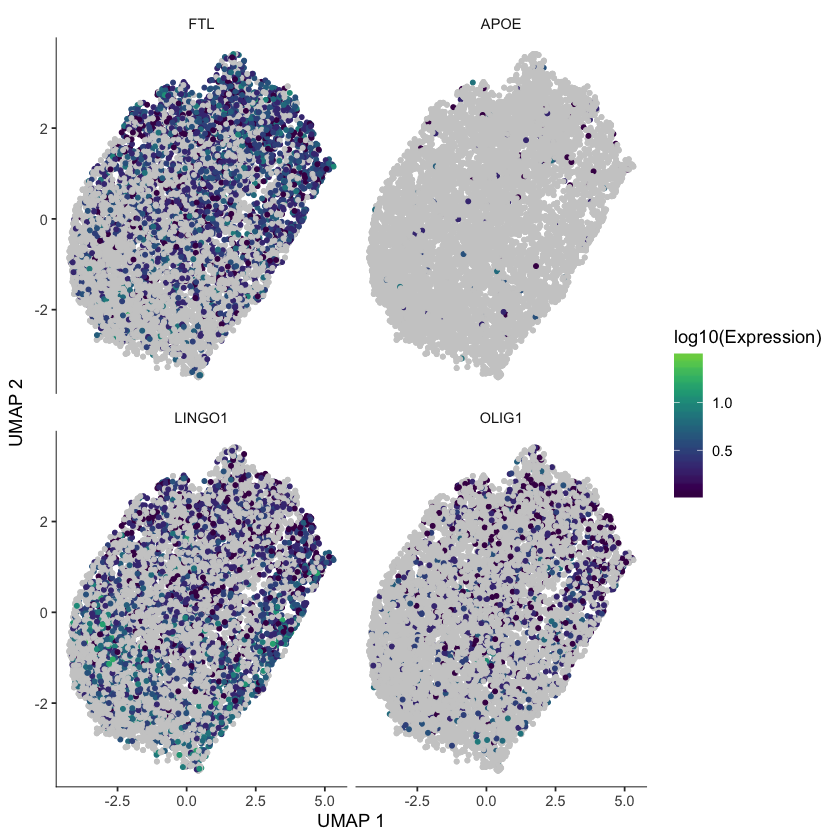

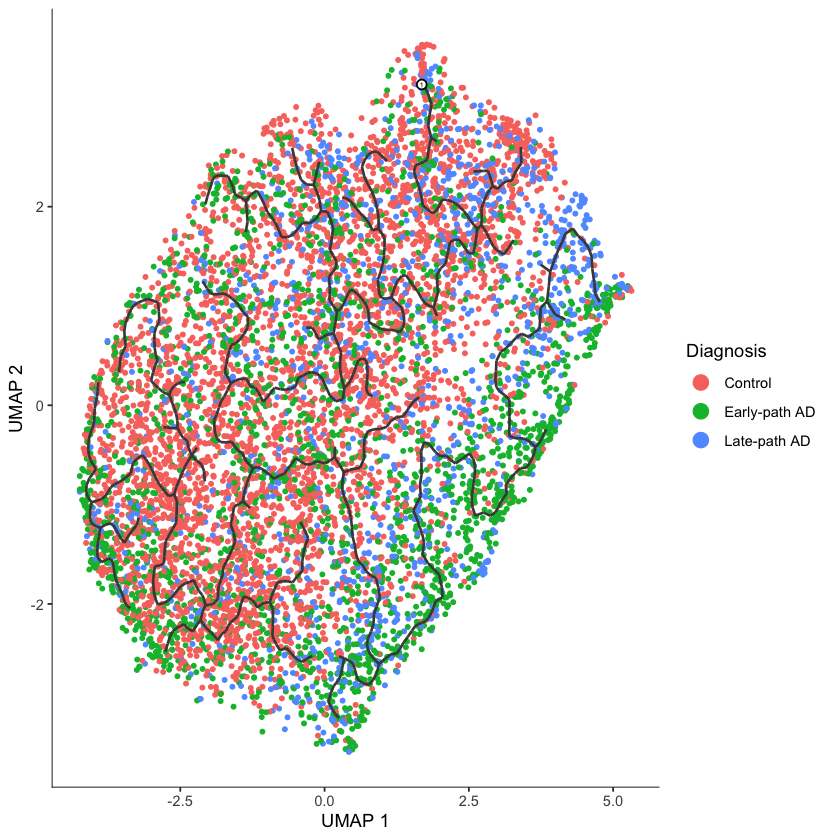

In [1375]:
cds_subset = cds[,cds$sex!='asdfmale']
cds_subset = cds_subset[,cds_subset$Subcluster=='Oli1'] # mic3 subcluster
cds_subset = cds_subset[rowSums(counts(cds_subset) != 0) >= 50,] # only keep genes non-zero in at least 20 cells
cds_subset = reduce_dimension(cds_subset)
cds_subset = cluster_cells(cds_subset)
if (length(unique(cds_subset@clusters$UMAP$partitions))>1){
    m<-0
    p<-"1"
    for (partition in unique(cds_subset@clusters$UMAP$partitions)){
        if (length(cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions==partition])>m){
                    m<-length(cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions==partition])
                    p<-partition
        }
    }
    cds_subset = cds_subset[,cds_subset@clusters$UMAP$partitions==p]
    cds_subset = reduce_dimension(cds_subset)
    cds_subset = cluster_cells(cds_subset)
}
###### pseudotime ########
cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions == "2"] <- "1"
cds_subset@clusters$UMAP$partitions[cds_subset@clusters$UMAP$partitions == "3"] <- "1"
cds_subset <- learn_graph(cds_subset)
inds = which(cds_subset$Diagnosis=='Control')
inds = which(cds_subset$cogdx[inds]<2)
inds <- sample(inds) # shuffle indices
best_ind = 1
best_ind2 = 1
best_dif = -Inf
i=0
for (ind in inds[1:min(length(inds),100)]){
    i=i+1
    cds_subset = order_cells(cds_subset,root_cells=row.names(colData(cds_subset))[ind])
    mc = median(pseudotime(cds_subset)[cds_subset$Diagnosis=='Control'])
    ma = median(pseudotime(cds_subset)[cds_subset$Diagnosis!='Control'])
    if (ma-mc > best_dif){
        best_dif = ma-mc
        best_ind = i
        best_ind2 = ind
    }
}
cds_subset = order_cells(cds_subset,root_cells=row.names(colData(cds_subset))[best_ind2]) # set root to best ind   
#####################

gene_fits = fit_models(cds_subset, model_formula_str = "~pseudotime+pmi+batch+educ+sex")
fit_coefs = coefficient_table(gene_fits)
fit_coefs  <- subset(fit_coefs, term != "(Intercept)")
fit_coefs2 <- subset(fit_coefs, term == "pseudotime")
fit_coefs2 <- subset(fit_coefs2, status == 'OK')
fit_coefs2 <- fit_coefs2[order(fit_coefs2$q_value),]
fit_coefs2 <- subset(fit_coefs2, q_value < .05)
fit_coefs2
fit_coefs[which(fit_coefs$gene_short_name=='CST3'),]
keeps = c("gene_short_name","test_val","p_value","normalized_effect","q_value")
fit_coefs2 = fit_coefs2[keeps]
write.csv(fit_coefs2[order(-fit_coefs2$normalized_effect),],file='/Users/relyanow/Documents/Sage/notebooks/figures/sn_Mathys/mic1.csv')
plot_cells(cds_subset, genes=c("FTL","APOE","LINGO1",'OLIG1'),cell_size=1,label_cell_groups=0,show_trajectory_graph=FALSE)
plot_cells(cds_subset, color_cells_by="Diagnosis",cell_size=1,label_cell_groups=FALSE, label_leaves=FALSE,label_branch_points=FALSE,graph_label_size=1.5)


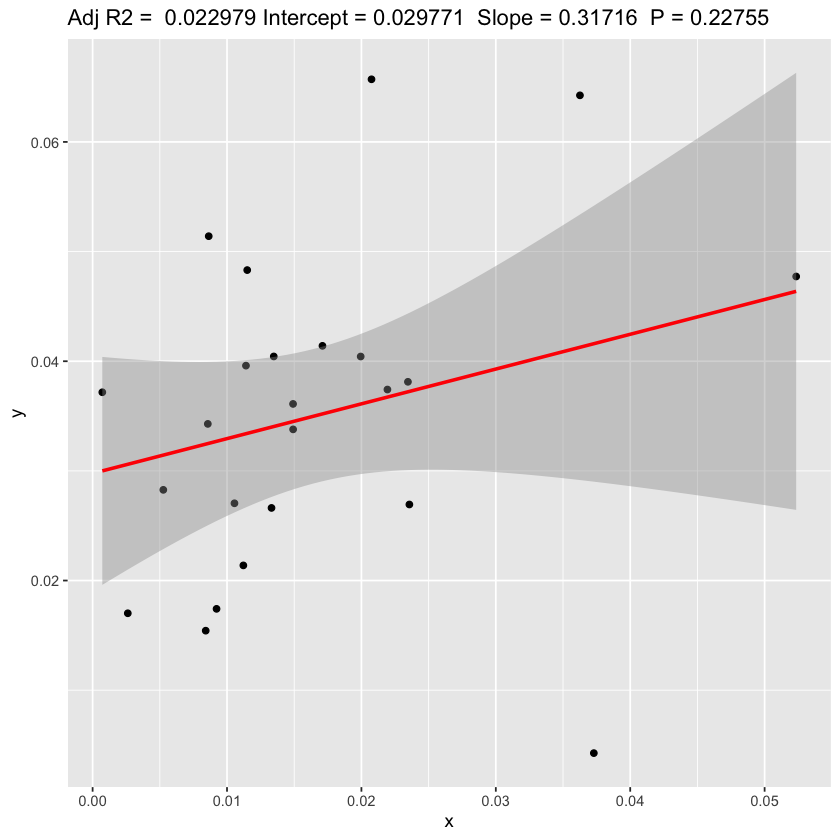

In [1711]:
library(ggpmisc)
x=c()
y=c()
cds_uw$ros_ids = cds_uw$ids
cds_uw$Subcluster = cds_uw$broad.cell.type
cds_uw$Subcluster[cds_uw$broad.cell.type=='Mic'] = cs$Mic1
subset <- cds[,cds$Diagnosis=='Control']
for (ros in unique(cds$ros_ids)){
    subset2 <- subset[,subset$ros_ids==ros]
    x <- c(x,(length(subset2$ros_ids[subset2$Subcluster=='Mic0']))/(length(subset2$ros_ids[subset2$broad.cell.type=='Mic'])))
    y <- c(y,(length(subset2$ros_ids[subset2$broad.cell.type=='Opc']))/(length(subset2$ros_ids)))
    }

df <- data.frame(x)
df$x = x
df$y = y
df$Mic1 = df$x
df$In = df$y

ggplotRegression <- function (fit) {

require(ggplot2)

ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1])) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5)))
}
ggplotRegression(lm(y ~ x, data = df))

In [720]:
library(Seurat)
library(scater)
library(batchelor)

dat_6672 <- Read10X_h5('../data/UW_10X_RNA/6672.filtered_feature_bc_matrix.h5')
dat_6687 <- Read10X_h5('../data/UW_10X_RNA/6687.filtered_feature_bc_matrix.h5')
dat_6726 <- Read10X_h5('../data/UW_10X_RNA/6726.filtered_feature_bc_matrix.h5')
dat_6774 <- Read10X_h5('../data/UW_10X_RNA/6774.filtered_feature_bc_matrix.h5')
dat_6802 <- Read10X_h5('../data/UW_10X_RNA/6802.filtered_feature_bc_matrix.h5')
dat_6829 <- Read10X_h5('../data/UW_10X_RNA/6829.filtered_feature_bc_matrix.h5')
dat_6845 <- Read10X_h5('../data/UW_10X_RNA/6845.filtered_feature_bc_matrix.h5')
dat_6874 <- Read10X_h5('../data/UW_10X_RNA/6874.filtered_feature_bc_matrix.h5')

colnames(dat_6672) <- paste(colnames(dat_6672), "6672", sep="_")
colnames(dat_6687) <- paste(colnames(dat_6687), "6687", sep="_")
colnames(dat_6726) <- paste(colnames(dat_6726), "6726", sep="_")
colnames(dat_6774) <- paste(colnames(dat_6774), "6774", sep="_")
colnames(dat_6802) <- paste(colnames(dat_6802), "6802", sep="_")
colnames(dat_6829) <- paste(colnames(dat_6829), "6829", sep="_")
colnames(dat_6845) <- paste(colnames(dat_6845), "6845", sep="_")
colnames(dat_6874) <- paste(colnames(dat_6874), "6874", sep="_")

ids <- c()
ids <- c(ids,rep(6672,length(colnames(dat_6672))))
ids <- c(ids,rep(6687,length(colnames(dat_6687))))
ids <- c(ids,rep(6726,length(colnames(dat_6726))))
ids <- c(ids,rep(6774,length(colnames(dat_6774))))
ids <- c(ids,rep(6802,length(colnames(dat_6802))))
ids <- c(ids,rep(6829,length(colnames(dat_6829))))
ids <- c(ids,rep(6845,length(colnames(dat_6845))))
ids <- c(ids,rep(6874,length(colnames(dat_6874))))
dat <- cbind2(dat_6672,dat_6687)
dat <- cbind2(dat,dat_6726)
dat <- cbind2(dat,dat_6774)
dat <- cbind2(dat,dat_6802)
dat <- cbind2(dat,dat_6829)
dat <- cbind2(dat,dat_6845)
dat <- cbind2(dat,dat_6874)
dim(dat)
head(colnames(dat))
head(rownames(dat))
length(ids)

metadata <-  read.csv('../data/UW_10X_RNA/metadata.csv',stringsAsFactors = F)
metadata
Labels = data.frame(colnames(dat))
Clinical.DX = c()
SEX = c()
ePRS = c()
PMI = c()

for(i in 1:length(ids)){
    Clinical.DX = c(Clinical.DX,metadata$Clinical.DX[c(which(metadata$Sample.ID==ids[i])[1])])
    SEX = c(SEX,metadata$SEX[c(which(metadata$Sample.ID==ids[i])[1])])
    ePRS = c(ePRS,metadata$ePRS[c(which(metadata$Sample.ID==ids[i])[1])])
    PMI = c(PMI,metadata$PMI[c(which(metadata$Sample.ID==ids[i])[1])])
}
Labels$ids = ids
ids<-0
Labels$Clinical.DX = Clinical.DX
Clinical.DX<-0
Labels$Sex = SEX
SEX<-0
Labels$ePRS = ePRS
ePRS<-0
Labels$PMI = PMI
PMI<-0

rownames(Labels) = colnames(dat)
head(Labels)

gene_short_name = data.frame(rownames(dat))
rownames(gene_short_name) <- rownames(dat)
gene_short_name$gene_short_name <- rownames(dat)

dat$ids = Labels$ids
counts <- dat[rowSums(dat != 0) >= 250,]

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3


[1] 33694 55811

[1] "AAACCCACAGTTTCAG-1_6672" "AAACGAAAGCTCTTCC-1_6672"
[3] "AAACGAACAGAGGCTA-1_6672" "AAACGAAGTCGGAAAC-1_6672"
[5] "AAACGCTAGCACGATG-1_6672" "AAACGCTAGGGTACAC-1_6672"

[1] "RP11-34P13.3"  "FAM138A"       "OR4F5"         "RP11-34P13.7" 
[5] "RP11-34P13.8"  "RP11-34P13.14"

[1] 55811

Sample.ID Clinical.DX AGE SEX path.DX               ePRS       PMI  Frozen
1  6774      no dementia 90+ F   AD                    -29.247860 3.00 Y     
2  6746      dementia    90+ F   AD                    -17.155345 5.92 Y     
3  6706      no dementia 90+ F   low AD                -10.839593   NA NA    
4  6845      dementia    90+ F   AD                     -9.874564 6.25 Y     
5  6672      no dementia 84  M   CTRL                   -6.279466 3.92 Y     
6  6861      no dementia 89  M   NO PATH                -3.252206 7.75 Y     
7  6772      no dementia 89  F   AD/PART?VBI            -1.836977 5.10 Y     
8  6867      no dementia 90+ F   BraakIII,Cerad sparse   7.106979 4.25 Y     
9  6802      dementia    60  F   AD                     20.717771 5.75 Y     
10 6729      dementia    74  F   AD                     22.307935 4.42 Y     
11 6687      no dementia 90+ M   AD                     22.366123 5.00 Y     
12 6726      no dementia 89  M   AD                     22.907869 6.75 Y     
13 6829      dementia    90+ F   AD                     26.990491 5.92 Y     
14 6874      no dementia 86  F   AD, VBI                37.428516 8.07 Y     
   snRNAseq Meninges.TISSUE Meniges.CELL.LINE Reprogramming    
1  IP       YES             NO                NA               
2  NA       NO              NO                NA               
3  NA       NA              NA                NA               
4  IP       YES             NO                NA               
5  IP       YES             YES               YES              
6  Y        NO              NO                NA               
7  NA       NO              NO                NA               
8  NA       NO              NO                NA               
9  IP       YES             YES               YES              
10 NA       YES             YES               NA               
11 IP       YES             YES               Failed-will retry
12 IP       NO              NO                NA               
13 IP       YES             YES               NA               
14 IP       YES             NO                NA

colnames.dat.           ids  Clinical.DX Sex ePRS     
AAACCCACAGTTTCAG-1_6672 AAACCCACAGTTTCAG-1_6672 6672 no dementia M   -6.279466
AAACGAAAGCTCTTCC-1_6672 AAACGAAAGCTCTTCC-1_6672 6672 no dementia M   -6.279466
AAACGAACAGAGGCTA-1_6672 AAACGAACAGAGGCTA-1_6672 6672 no dementia M   -6.279466
AAACGAAGTCGGAAAC-1_6672 AAACGAAGTCGGAAAC-1_6672 6672 no dementia M   -6.279466
AAACGCTAGCACGATG-1_6672 AAACGCTAGCACGATG-1_6672 6672 no dementia M   -6.279466
AAACGCTAGGGTACAC-1_6672 AAACGCTAGGGTACAC-1_6672 6672 no dementia M   -6.279466
                        PMI 
AAACCCACAGTTTCAG-1_6672 3.92
AAACGAAAGCTCTTCC-1_6672 3.92
AAACGAACAGAGGCTA-1_6672 3.92
AAACGAAGTCGGAAAC-1_6672 3.92
AAACGCTAGCACGATG-1_6672 3.92
AAACGCTAGGGTACAC-1_6672 3.92

ERROR: Error in `$<-`(`*tmp*`, ids, value = c(6672, 6672, 6672, 6672, 6672, 6672, : no method for assigning subsets of this S4 class


In [1025]:
library(scater)
library(batchelor)
library(monocle3)

cds_uw<-0
sce<-0
dat<-0
sce = readRDS("UW_scran_normalized.rds")
counts2 = counts(sce)
counts2 <- counts2[rowSums(counts2 != 0) >= 500,]
dim(counts2)
gene_short_name <- data.frame(rownames(counts2))
rownames(gene_short_name) <- rownames(counts2)
gene_short_name$gene_short_name <- rownames(counts2)
rownames(Labels)<-colnames(counts2)
head(gene_short_name)
length(gene_short_name)

cds_uw <- new_cell_data_set(counts2,
                     cell_metadata = Labels,
                     gene_metadata = gene_short_name)

[1] 16953 55811

rownames.counts2. gene_short_name
RP11-34P13.7  RP11-34P13.7      RP11-34P13.7   
FO538757.2    FO538757.2        FO538757.2     
AP006222.2    AP006222.2        AP006222.2     
RP4-669L17.10 RP4-669L17.10     RP4-669L17.10  
RP5-857K21.4  RP5-857K21.4      RP5-857K21.4   
RP11-206L10.9 RP11-206L10.9     RP11-206L10.9

[1] 2

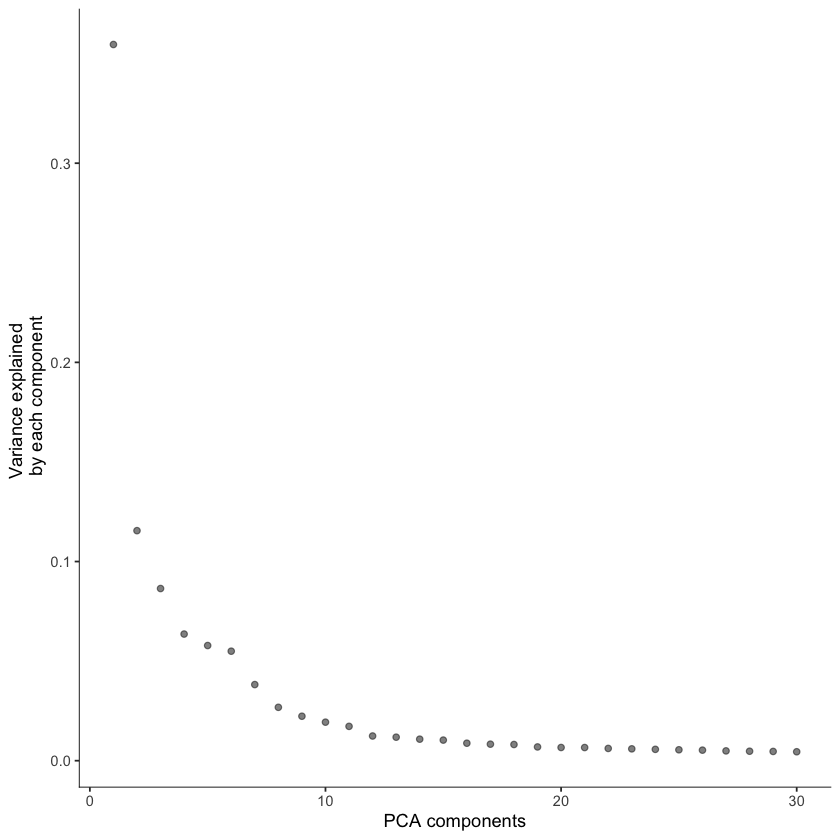

In [1034]:
cds_subset<-0
counts2<-0
cds<-0
counts<-0
sce<-0
#cds_uw<-cds_uw[genes,]
cds_uw = preprocess_cds(cds_uw, num_dim = 30,residual_model_formula_str="~PMI")
cds_uw = reduce_dimension(cds_uw)
cds_uw = cluster_cells(cds_uw)
plot_pc_variance_explained(cds_uw)

cds_uw$Diagnosis = cds_uw$Clinical.DX
cds_uw$Sex = cds_uw$Sex
cds_uw$Samples = cds_uw$ids

In [1035]:
cds_uw$Sex = Labels$Sex
head(cds_uw$Sex)

[1] "M" "M" "M" "M" "M" "M"

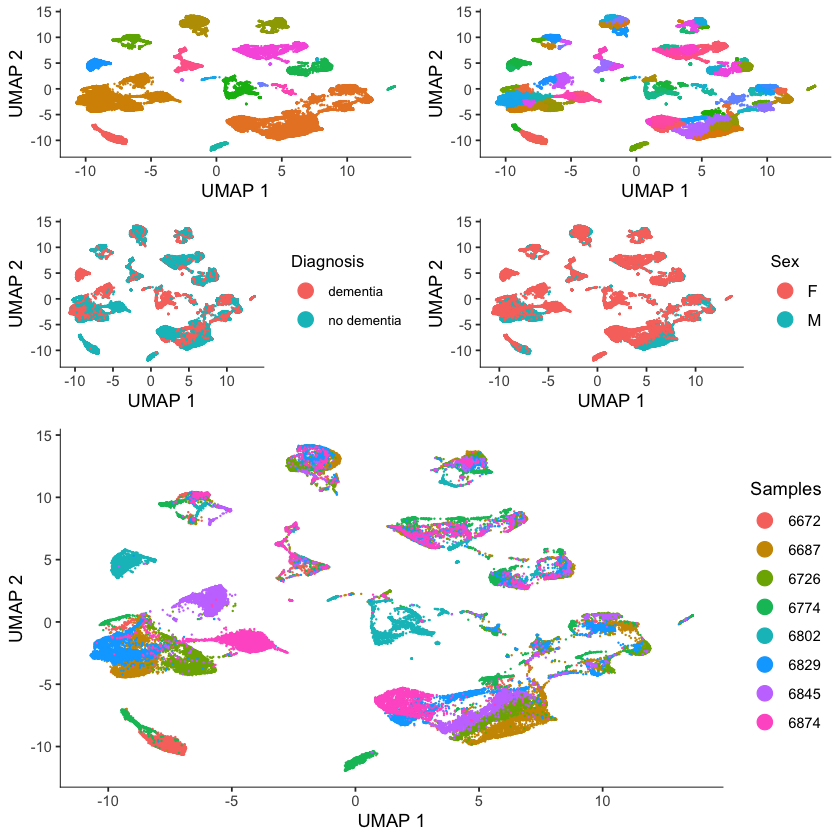

In [1036]:

p1<-plot_cells(cds_uw, color_cells_by="partition",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 10))+theme(legend.position = "none")
p2<-plot_cells(cds_uw, color_cells_by="Sex",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 10))
p3<-plot_cells(cds_uw, color_cells_by="Diagnosis",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 8))
p4<-plot_cells(cds_uw, color_cells_by="Samples",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)
p6<-plot_cells(cds_uw, color_cells_by="cluster",cell_size=.1,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 7),legend.key.size = unit(.5, "cm"),
  legend.key.width = unit(0.5,"cm") )+theme(legend.position = "none")
#pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/UW_sn_summary.pdf"))
grid.arrange(arrangeGrob(p1,p6, ncol=2),arrangeGrob(p3,p2,ncol=2),p4, heights=c(2,2,4), ncol=1)
#dev.off()

In [929]:
mathy_marker_genes <- read.csv('../data/mathys_marker_genes.csv')
names(mathy_marker_genes) <- as.matrix(mathy_marker_genes[1, ])
mathy_marker_genes <- mathy_marker_genes[-1, ]
mathy_marker_genes$adj.pvals = as.numeric(as.character(mathy_marker_genes$adj.pvals))
#mathy_marker_genes <- mathy_marker_genes[mathy_marker_genes$adj.pvals<1e-20,]
head(mathy_marker_genes)

genes<-c()
for (gene in unique(c(as.vector(mathy_marker_genes$gene.name),c("SYT1","SNAP25","GRIN1","GAD1","GAD2","SLC17A7","CAMK2A","NRGN","AQP4",
                              "GFAP","MBP","MOBP","PLP1","PDGFRA","VCAN","CD74","CSF1R","C3","FLT1","CLDN5")))){
    if (gene %in% rownames(cds_uw)){
        genes <- c(genes,which(rownames(cds_uw)==gene))
    }
}
length(genes)

gene.name  adj.pvals lFC         subpopulation <NA> <NA> <NA> <NA>
2 DAB1       0         1.138272233 Ex0           NA   NA   NA   NA  
3 ST6GALNAC5 0         0.68265007  Ex0           NA   NA   NA   NA  
4 DPYD       0         0.604381037 Ex0           NA   NA   NA   NA  
5 RPS6KC1    0         0.639586954 Ex0           NA   NA   NA   NA  
6 CHRM3      0         0.530655173 Ex0           NA   NA   NA   NA  
7 SMYD3      0         0.508785267 Ex0           NA   NA   NA   NA  
  subpopulation size (n) 
2 Ast0          1728     
3 Ast1          1134     
4 Ast2          369      
5 Ast3          161      
6 Ex0           7612     
7 Ex1           4383

[1] 4240

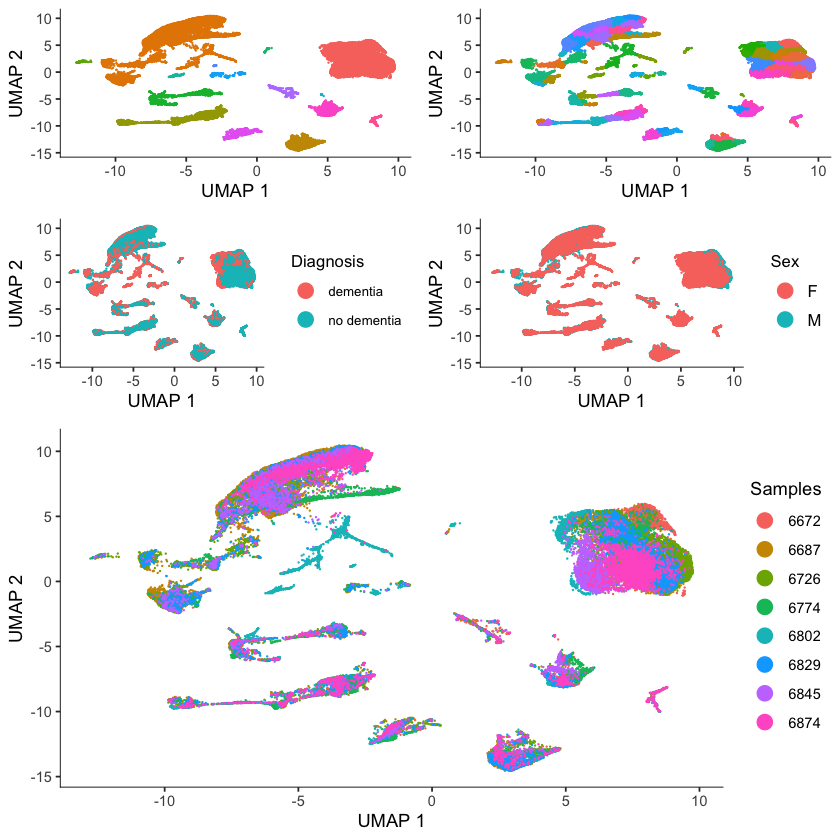

In [1037]:
cds_subset = cds_uw[genes,]
cds_subset = preprocess_cds(cds_subset, num_dim = 30,method="PCA",residual_model_formula_str="~PMI",norm_method="size_only")
cds_subset = reduce_dimension(cds_subset)
cds_subset = cluster_cells(cds_subset)

p1<-plot_cells(cds_subset, color_cells_by="partition",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 10))+theme(legend.position = "none")
p2<-plot_cells(cds_subset, color_cells_by="Sex",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 10))
p3<-plot_cells(cds_subset, color_cells_by="Diagnosis",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 8))
p4<-plot_cells(cds_subset, color_cells_by="Samples",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)
p6<-plot_cells(cds_subset, color_cells_by="cluster",cell_size=.1,label_cell_groups=0,show_trajectory_graph=FALSE)+theme(
  legend.title = element_text(size = 10),
  legend.text = element_text(size = 7),legend.key.size = unit(.5, "cm"),
  legend.key.width = unit(0.5,"cm") )+theme(legend.position = "none")
#pdf(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/UW_sn_summary_marker_genes.pdf"))
grid.arrange(arrangeGrob(p1,p6, ncol=2),arrangeGrob(p3,p2,ncol=2),p4, heights=c(2,2,4), ncol=1)
#dev.off()

In [1080]:
saveRDS(cds_subset, file = "UW_monocle_preprocessed_cds.rds")

In [1376]:
cds_uw <- readRDS(file = "UW_monocle_preprocessed_cds.rds")

In [1087]:
png(paste0("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/UW_sn_diffexp_markers.png"),width = 150, height = 150, units='mm', res = 300)
plot_cells(cds_subset, genes=c("SYT1","SNAP25","GRIN1","GAD1","GAD2","SLC17A7","CAMK2A","NRGN","AQP4",
                              "GFAP","MBP","MOBP","PLP1","PDGFRA","VCAN","CD74","CSF1R","C3","FLT1","CLDN5"),
           show_trajectory_graph=FALSE,
           label_cell_groups=FALSE,
           label_leaves=FALSE,reduction_method="UMAP",cell_size=.1)
dev.off()

pdf 
  2

No trajectory to plot. Has learn_graph() been called yet?


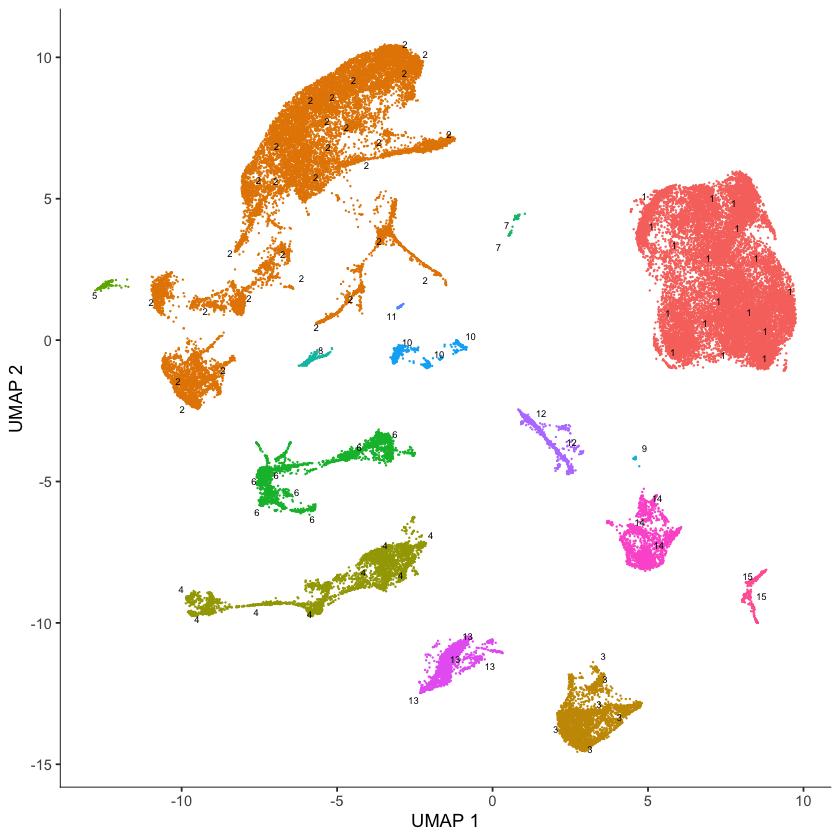

In [968]:
plot_cells(cds_subset, color_cells_by="partition",cell_size=.001,label_cell_groups=1)

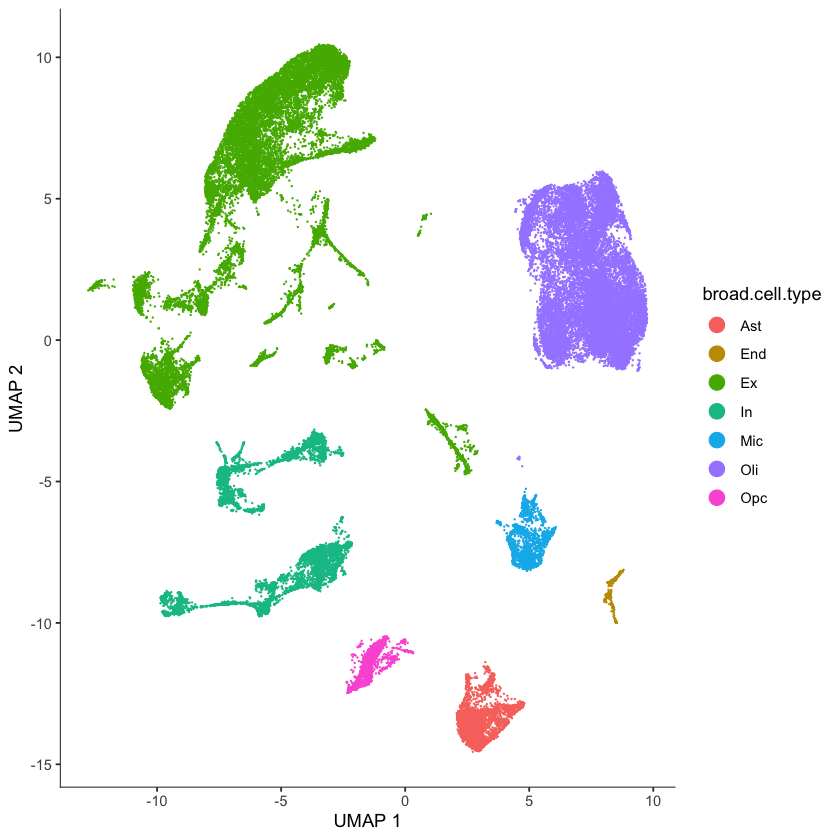

In [1039]:
cds_subset$broad.cell.type = cds_subset$Sex
for (partition in unique(partitions(cds_subset))){
    interneuron <- mean(counts(cds_subset)[rownames(cds_subset)=="GAD1",partitions(cds_subset)==partition])
    interneuron <- mean(c(interneuron,mean(counts(cds_subset)[rownames(cds_subset)=="GAD2",partitions(cds_subset)==partition])))
    Ex <- mean(counts(cds_subset)[rownames(cds_subset)=="CAMK2A",partitions(cds_subset)==partition])
    Ex <- mean(c(Ex,mean(counts(cds_subset)[rownames(cds_subset)=="NRGN",partitions(cds_subset)==partition])))
    Ast <- mean(counts(cds_subset)[rownames(cds_subset)=="AQP4",partitions(cds_subset)==partition])
    Ast <- mean(c(Ast,mean(counts(cds_subset)[rownames(cds_subset)=="GFAP",partitions(cds_subset)==partition])))/2
    Oli <- mean(counts(cds_subset)[rownames(cds_subset)=="MBP",partitions(cds_subset)==partition])
    Oli <- mean(c(Oli,mean(counts(cds_subset)[rownames(cds_subset)=="PLP1",partitions(cds_subset)==partition])))/3
    OPC <- mean(counts(cds_subset)[rownames(cds_subset)=="PDGFRA",partitions(cds_subset)==partition])
    OPC <- mean(c(OPC,mean(counts(cds_subset)[rownames(cds_subset)=="VCAN",partitions(cds_subset)==partition])))
    Mic <- mean(counts(cds_subset)[rownames(cds_subset)=="CD74",partitions(cds_subset)==partition])
    Mic <- mean(c(Mic,mean(counts(cds_subset)[rownames(cds_subset)=="CSF1R",partitions(cds_subset)==partition])))
    End <- mean(counts(cds_subset)[rownames(cds_subset)=="FLT1",partitions(cds_subset)==partition])
    End <- mean(c(End,mean(counts(cds_subset)[rownames(cds_subset)=="CLDN5",partitions(cds_subset)==partition])))
    names <- c('In','Ex','Ast','Oli','Opc','Mic','End')
    means <- c(interneuron, Ex, Ast, Oli, OPC, Mic, End)
    best_name <- names[which(means == max(means))]
    cds_subset$broad.cell.type[partitions(cds_subset)==partition] = best_name
}
plot_cells(cds_subset, color_cells_by="broad.cell.type",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)

In [1031]:
for (celltype in unique(cds_subset$broad.cell.type)){
    print(celltype)
    print(length(cds_subset$broad.cell.type[cds_subset$broad.cell.type==celltype])/length(colnames(cds_subset)))
}

# Ex	34976	0.497199556
# Ast	3392	0.048218804
# In	9196	0.130725272
# Mic	1920	0.027293663
# Oli	18235	0.259218719
# Opc	2627	0.037343985

[1] "Oli"
[1] 0.3478884
[1] "Ex"
[1] 0.398219
[1] "Mic"
[1] 0.02981491
[1] "In"
[1] 0.1316586
[1] "Opc"
[1] 0.04264392
[1] "Ast"
[1] 0.04977513


In [972]:
cds$broad.cell.type[cds$broad.cell.type=='Per'] ='End'
p1<-plot_cells(cds, color_cells_by="broad.cell.type",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+ggtitle('ROSMAP')+theme(axis.title=element_text(size=10))
p2<-plot_cells(cds_subset, color_cells_by="broad.cell.type",cell_size=.001,label_cell_groups=0,show_trajectory_graph=FALSE)+ggtitle('UW')+theme(axis.title=element_text(size=10))


celltype <- c(rep("Ex" , 2) , rep("Oli" , 2) ,rep("In",2),rep("Ast",2),rep("Opc",2),rep("Mic",2),rep("End",2) )
dataset <- rep(c("ROSMAP" , "UW") , 7)
Percent <- c(.50,.39,.26,.33,.13,.13,.05,.06,.04,.04,.03,.04,.01,.01)
data <- data.frame(celltype,dataset,Percent)
#Turn your 'treatment' column into a character vector
data$celltype <- as.character(data$celltype)
#Then turn it back into a factor with the levels in the correct order
data$celltype <- factor(data$celltype, levels=unique(data$celltype))
# Grouped
p3<-ggplot(data, aes(fill=dataset, y=Percent, x=celltype)) + 
    geom_bar(position="dodge", stat="identity")+ theme_classic()+theme(text=element_text(size=21))
pdf("/Users/relyanow/Documents/Sage/ROSMAP_sn_writeup/figures/celltypes_by_dataset_percentage.pdf") 
grid.arrange(arrangeGrob(p1,p2,ncol=2),p3,ncol=1,heights=c(.6,1))
dev.off()

pdf 
  2

In [1070]:
cds_subset$dementia = cds_subset$Diagnosis
cds_subset$Diagnosis = cds_subset$dementia
cds_subset$Diagnosis[cds_subset$ids==6672]='Control'
cds_subset$Diagnosis[cds_subset$ids!=6672]='AD'

In [ ]:
## Identify Mic1 subcluster in UW data

In [1407]:

#l = c(l,as.vector(mathy_marker_genes$gene.name[mathy_marker_genes$subpopulation=='Mic0']))
l = as.vector(mathy_marker_genes$gene.name[mathy_marker_genes$subpopulation=='Mic1'])
#l = c(l,as.vector(mathy_marker_genes$gene.name[mathy_marker_genes$subpopulation=='Mic2']))
l = unique(l)
length(l)
inds = c()
for (gene in l){
    if ((gene %in% rownames(cds_uw))){
    inds = c(inds,which(rownames(cds_uw)==gene))
    }
}
cds_subset <- cds_uw[inds,cds_uw$broad.cell.type=='Mic']
cds_subset <- preprocess_cds(cds_subset, num_dim = 30,residual_model_formula_str="~PMI")
cds_subset = reduce_dimension(cds_subset)
cds_subset = cluster_cells(cds_subset)

[1] 77

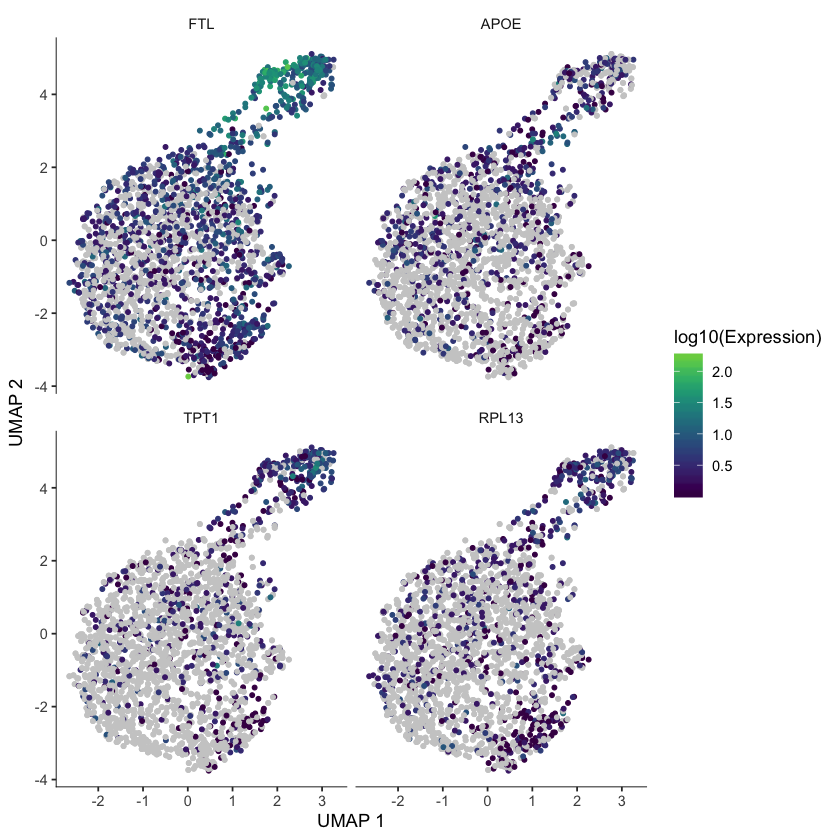

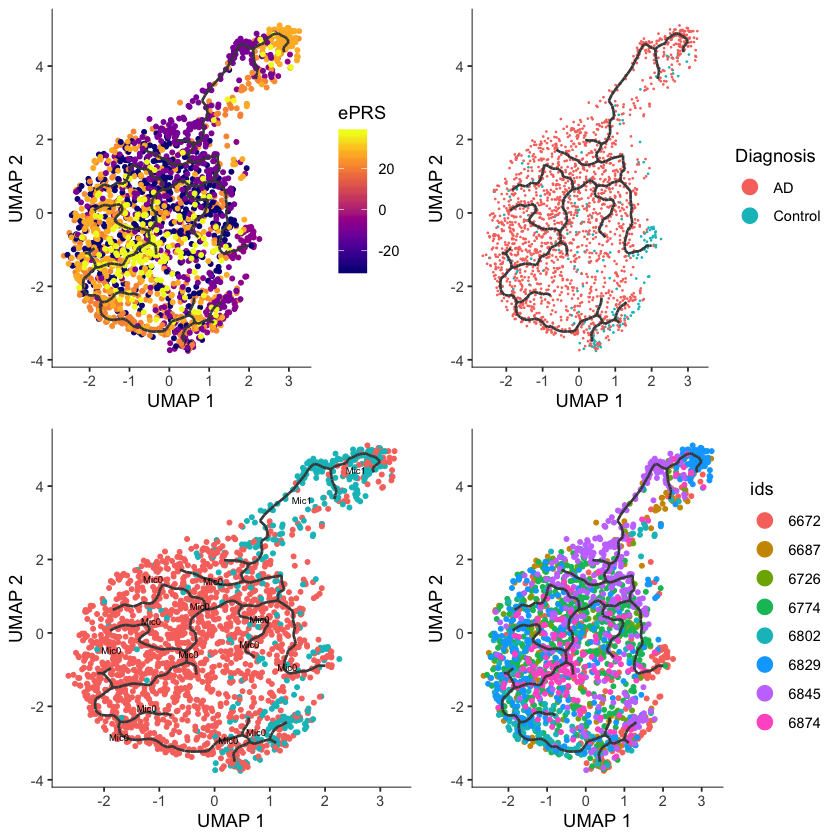

In [1568]:
#cs<-cs[,cs$apoe>0]
cs = cds_uw[,cds_uw$broad.cell.type=='Mic']
cs$Mic1 = cs$Sex
# cs$Mic1[clusters(cds_subset)==7]='Mic1'
# cs$Mic1[clusters(cds_subset)==11]='Mic1'
# cs$Mic1[clusters(cds_subset)==5]='Mic1'
cs$Mic1[log(as.vector(counts(cs)[rownames(cs)=='FTL',]))>1.5]='Mic1'
cs$Mic1[cs$Mic1!='Mic1']='Mic0'
cds_subset$Mic1 = cs$Mic1
plot_cells(cds_subset, genes=c("FTL","APOE","TPT1","RPL13","SLC5A11","NLGN1"),cell_size=1,label_cell_groups=0,show_trajectory_graph=FALSE)
p1<-plot_cells(cds_subset, color_cells_by="ePRS",cell_size=1,label_cell_groups=0,show_trajectory_graph=TRUE,label_leaves=FALSE,label_branch_points=FALSE)
p2<-plot_cells(cds_subset, color_cells_by="Diagnosis",cell_size=.1,label_cell_groups=0,show_trajectory_graph=TRUE,label_leaves=FALSE,label_branch_points=FALSE)
p3<-plot_cells(cds_subset, color_cells_by='Mic1',cell_size=1,label_cell_groups=1,show_trajectory_graph=TRUE,label_leaves=FALSE,label_branch_points=FALSE)
p4<-plot_cells(cds_subset, color_cells_by="ids",cell_size=1,label_cell_groups=0,show_trajectory_graph=TRUE,label_leaves=FALSE,label_branch_points=FALSE)
grid.arrange(p1,p2,p3,p4,ncol=2)


In [1430]:
cs2 <- cs[,cs$Sex=='M']
gene_fits = fit_models(cs2, model_formula_str = "~Mic1+PMI")
fit_coefs = coefficient_table(gene_fits)
fit_coefs  <- subset(fit_coefs, term != "(Intercept)")
fit_coefs2 <- subset(fit_coefs, term == "Mic1Mic1")
fit_coefs2 <- subset(fit_coefs2, status == 'OK')
fit_coefs2 <- fit_coefs2[order(fit_coefs2$q_value),]
fit_coefs2 <- subset(fit_coefs2, q_value < .05)
fit_coefs2
fit_coefs[which(fit_coefs$gene_short_name=='CST3'),]
keeps = c("gene_short_name","test_val","p_value","normalized_effect","q_value")
fit_coefs2 = fit_coefs2[keeps]
write.csv(fit_coefs2[order(-fit_coefs2$normalized_effect),],file='/Users/relyanow/Documents/Sage/notebooks/figures/sn_Mathys/mic1.csv')


rownames.counts2. gene_short_name status term     estimate  std_err  
1  FTL               FTL             OK     Mic1Mic1 1.4585632 0.1005723
2  RPS6              RPS6            OK     Mic1Mic1 1.8502257 0.1833843
3  RPL13             RPL13           OK     Mic1Mic1 1.4083877 0.1433146
4  FTH1              FTH1            OK     Mic1Mic1 1.0273328 0.1065273
5  RPS15             RPS15           OK     Mic1Mic1 1.7372920 0.1879571
6  RPS27A            RPS27A          OK     Mic1Mic1 1.6901216 0.1923294
7  RPS3              RPS3            OK     Mic1Mic1 1.4029584 0.1733812
8  RPL19             RPL19           OK     Mic1Mic1 1.6623740 0.2079567
9  APOE              APOE            OK     Mic1Mic1 1.2822362 0.1668301
10 RPS25             RPS25           OK     Mic1Mic1 1.7384645 0.2409234
11 RPL11             RPL11           OK     Mic1Mic1 1.2347204 0.1814975
12 RPL15             RPL15           OK     Mic1Mic1 1.2286757 0.1848360
13 RPS2              RPS2            OK     Mic1Mic1 1.2707353 0.1920503
14 CST3              CST3            OK     Mic1Mic1 1.1502764 0.1742725
15 RPL10             RPL10           OK     Mic1Mic1 1.1573957 0.1770086
16 RPLP1             RPLP1           OK     Mic1Mic1 1.3554454 0.2110853
17 RPS8              RPS8            OK     Mic1Mic1 1.5896671 0.2485981
18 RPS11             RPS11           OK     Mic1Mic1 1.5591482 0.2471208
19 HLA-DRA           HLA-DRA         OK     Mic1Mic1 1.0144787 0.1610363
20 RPS19             RPS19           OK     Mic1Mic1 1.0279431 0.1666370
21 RPS18             RPS18           OK     Mic1Mic1 1.7799762 0.2912940
22 RPL32             RPL32           OK     Mic1Mic1 1.3552761 0.2276264
23 MECOM             MECOM           OK     Mic1Mic1 2.2330339 0.3753753
24 RPL13A            RPL13A          OK     Mic1Mic1 1.2631938 0.2140275
25 RPS16             RPS16           OK     Mic1Mic1 1.4684961 0.2502310
26 TPT1              TPT1            OK     Mic1Mic1 1.3704028 0.2344144
27 PLEKHA7           PLEKHA7         OK     Mic1Mic1 1.5077260 0.2610057
28 TMSB4X            TMSB4X          OK     Mic1Mic1 0.7054293 0.1242630
29 RPL23A            RPL23A          OK     Mic1Mic1 1.4202770 0.2520682
30 EEF1A1            EEF1A1          OK     Mic1Mic1 1.0496260 0.1867409
31 RPS24             RPS24           OK     Mic1Mic1 1.1635425 0.2161306
32 RPL29             RPL29           OK     Mic1Mic1 1.1541261 0.2144602
33 RPL28             RPL28           OK     Mic1Mic1 1.2533154 0.2339502
34 HDDC2             HDDC2           OK     Mic1Mic1 2.5527350 0.4880651
35 RPL14             RPL14           OK     Mic1Mic1 1.1144978 0.2132836
36 C1QB              C1QB            OK     Mic1Mic1 0.8742737 0.1677794
37 RPLP0             RPLP0           OK     Mic1Mic1 1.1895076 0.2294628
38 TMSB10            TMSB10          OK     Mic1Mic1 1.0530762 0.2044295
39 TXNRD1            TXNRD1          OK     Mic1Mic1 0.9314237 0.1815228
40 C1QA              C1QA            OK     Mic1Mic1 1.2192330 0.2395908
41 ACTB              ACTB            OK     Mic1Mic1 0.7415328 0.1461567
42 RPL7              RPL7            OK     Mic1Mic1 1.5422702 0.3104493
43 RPL8              RPL8            OK     Mic1Mic1 1.1974722 0.2458392
44 RPL35             RPL35           OK     Mic1Mic1 1.5013624 0.3144054
45 UQCRHL            UQCRHL          OK     Mic1Mic1 3.5186580 0.7430231
46 CD14              CD14            OK     Mic1Mic1 1.2713707 0.2693817
47 GAPDH             GAPDH           OK     Mic1Mic1 0.8373655 0.1798388
48 B3GALNT1          B3GALNT1        OK     Mic1Mic1 2.8355963 0.6130551
49 SYBU              SYBU            OK     Mic1Mic1 2.8367511 0.6165609
50 UQCRB             UQCRB           OK     Mic1Mic1 1.6973815 0.3692151
51 RPS9              RPS9            OK     Mic1Mic1 0.8561744 0.1864587
52 RPS4X             RPS4X           OK     Mic1Mic1 1.2257880 0.2683298
53 NACA              NACA            OK     Mic1Mic1 1.0868468 0.2383862
54 FAU               FAU             OK     Mic1Mic1 1.200325

rownames.counts2. gene_short_name status term     estimate   std_err  
1 CST3              CST3            OK     Mic1Mic1  1.1502764 0.1742725
2 CST3              CST3            OK     PMI      -0.0374547 0.0778366
  test_val p_value  normalized_effect model_component q_value    
1  6.6004  1.09e-10  1.64243050       count           4.60743e-07
2 -0.4812  6.31e-01 -0.05308856       count           1.00000e+00